# Series de tiempo sinusoidales con python
Estoy desarrollando varios experimentos sobre series temporales usando python, estos experimentos buscan aclarar los conceptos más sencillos y entender como aplicarlos a otras series más complejas.
En este caso contruyo una serie de tiempo de tipo sinusoidal, es decir una curva que describe una suave oscilacion periódica. Esta es una de las formas más básicas en función del tiempo.

In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [42]:
from statsmodels.tsa.stattools import acf, pacf


Tiene la forma:
**x(t)=Acos(2πft+ϕ)**

donde:
* **A** = Amplitud, el pico de desviación de la función desde cero.
* **f** = Frecuencia, número de oscilaciones que ocurren cada unidad de tiempo.
* **t** = Conjunto de valores en el tiempo.
* **ϕ** = desplazamineto en la fase.


## Configuración de Parámetros
Generé diferentes ejemplos para ver los cambios en la serie de tiempo y entender un poco más como la afecta la modificación de cada parámetro.

### Ejercicio 1
A continuación construyo una serie sinusoidal con frecuencia de 5Hz, amplitud de 0.8 y con un retaso de fase de pi/4 radianes, el rango de valores de tiempo es entre 0 y 1 con diferencias de 0.01 constantes.

In [28]:
A = .8
f = 5
t = np.arange(0,1,.01)
phi = np.pi/4

Los valores de la serie se calculan con la formula antes descrita.

In [82]:
def get_xvalues(time, amp, freq, phase):
    vals = amp*np.cos(2*np.pi*freq*time + phase)
    print('Cantidad de registros {0}'.format(len(vals)))
    print('Values \n{0}'.format(vals[0:10]))
    return vals

In [131]:
def plot_wave(time, values):
    plt.figure(figsize=(16,7))
    plt.plot(time, values, marker='o')
    plt.axhline(values.mean(), linestyle='dashed', color='red', label='Media')
    plt.legend(loc='upper right')
    plt.axis([0,1,-1,1])
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    plt.show()

Cantidad de registros 100
Values 
[ 0.56568542  0.3631924   0.12514757 -0.12514757 -0.3631924  -0.56568542
 -0.71280522 -0.79015067 -0.79015067 -0.71280522]


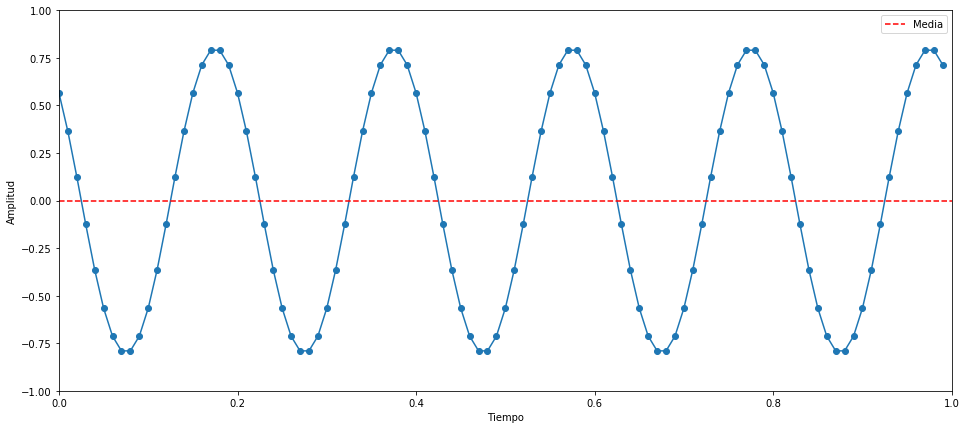

In [132]:
plot_wave(t, get_xvalues(t, A, f, phi))

### Ejercicio 2
Para ver los cambios voy a modificar algunos de los parámetros, voy a reducir la amplitud y a aumentar la frecuencia para apreciar los cambios.

Cantidad de registros 100
Values 
[ 0.21213203  0.06544297 -0.10162138 -0.2370465  -0.29866859 -0.26730196
 -0.15271242  0.00942323  0.16862501  0.27532639]


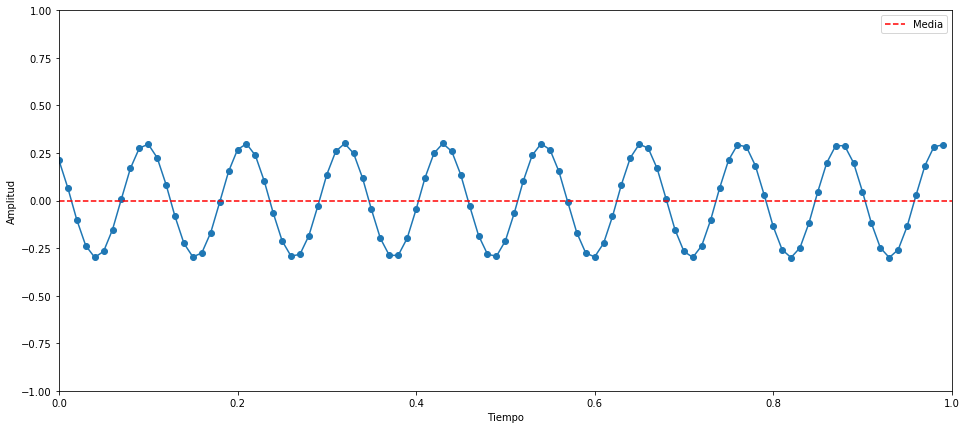

In [139]:
A2 = .3
f2 = 9
plot_wave(t, get_xvalues(t, A2, f2, phi))

Una variación muy clara que genera una onda mas corta que varia mucho más rápido.

### Ejercicio 3
Cambio de nuevo los valores de amplitud y frecuencia para apreciar mejor el cambio, en este caso aumento la amplitud y la frecuencia.

Cantidad de registros 100
Values 
[ 0.70003571 -0.44945059 -0.97781146 -0.15487012  0.88209646  0.70003571
 -0.44945059 -0.97781146 -0.15487012  0.88209646]


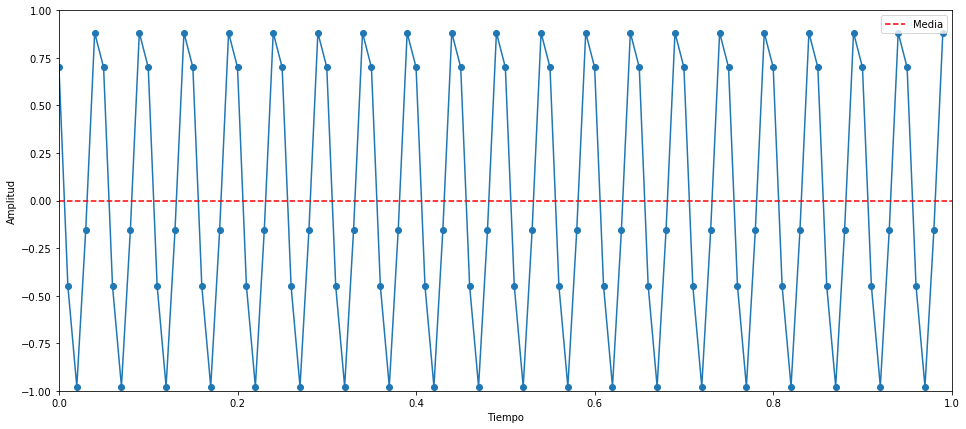

In [140]:
A3 = .99
f3 = 20
plot_wave(t, get_xvalues(t, A3, f3, phi))

En los casos anteriores la media se mantiene estable debito al comportamiento periódico de la serie.

### Ejercicio 4
En este caso cambio la fase para como afecta el comportamiento de la serie.

Cantidad de registros 100
Values 
[ 4.89858720e-17 -2.47213595e-01 -4.70228202e-01 -6.47213595e-01
 -7.60845213e-01 -8.00000000e-01 -7.60845213e-01 -6.47213595e-01
 -4.70228202e-01 -2.47213595e-01]


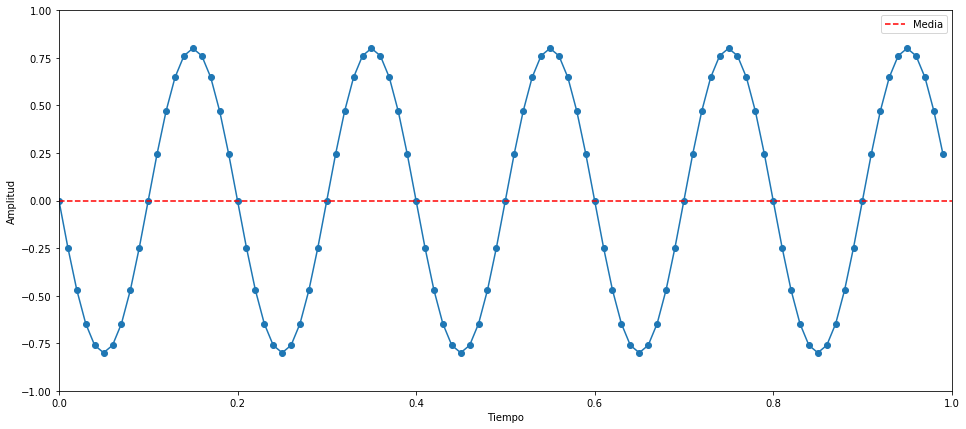

In [141]:
phi4 = np.pi/2
plot_wave(t, get_xvalues(t, A, f, phi4))

No parece haber ningun cambio, para comprobarlo voy a graficar la serie original y los cambios en el mismo gráfico.

In [103]:
def plot_waves(time, values1, values2):
    plt.figure(figsize=(16,7))
    plt.plot(time, values1, color='blue', label='values1')
    plt.plot(time, values2, color='green', label='values2')
    plt.axhline(values1.mean(), linestyle='dashed', color='red', label='Media')
    
    plt.legend(loc='upper right')
    plt.axis([0,1,-1,1])
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    plt.show()

Cantidad de registros 100
Values 
[ 0.56568542  0.3631924   0.12514757 -0.12514757 -0.3631924  -0.56568542
 -0.71280522 -0.79015067 -0.79015067 -0.71280522]
Cantidad de registros 100
Values 
[ 4.89858720e-17 -2.47213595e-01 -4.70228202e-01 -6.47213595e-01
 -7.60845213e-01 -8.00000000e-01 -7.60845213e-01 -6.47213595e-01
 -4.70228202e-01 -2.47213595e-01]


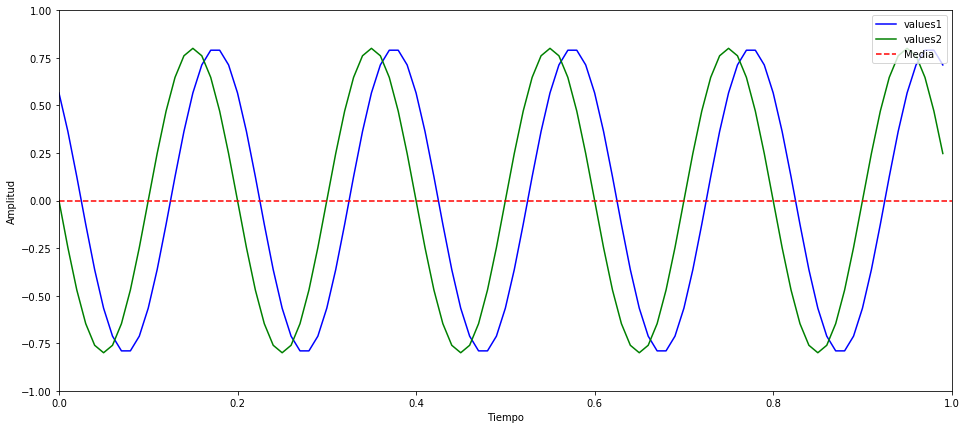

In [104]:
plot_waves(t, get_xvalues(t, A, f, phi), get_xvalues(t, A, f, phi4))

Parece que la fase desplaza los valores sobre el eje del tiempo, en azul tenemos la serie original del ejemplo 1 y en verde una serie con la fase aumentada. en el caso de la serie en clolr verde la fase es igual a π/2, lo que hace que el desplazamiento sea más corto.

### Ejercicio 5
En este caso voy a dejar la fase completa con el valor de π.

Cantidad de registros 100
Values 
[ 0.56568542  0.3631924   0.12514757 -0.12514757 -0.3631924  -0.56568542
 -0.71280522 -0.79015067 -0.79015067 -0.71280522]
Cantidad de registros 100
Values 
[-8.00000000e-01 -7.60845213e-01 -6.47213595e-01 -4.70228202e-01
 -2.47213595e-01 -1.46957616e-16  2.47213595e-01  4.70228202e-01
  6.47213595e-01  7.60845213e-01]


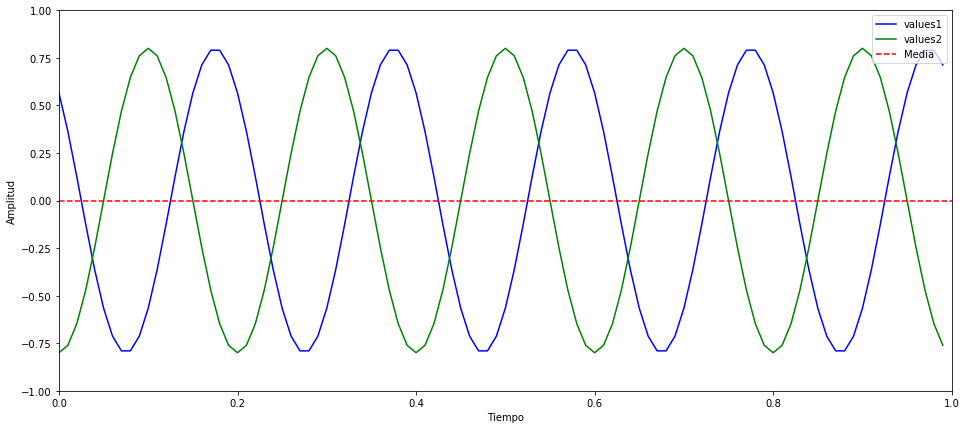

In [105]:
phi5 = np.pi
plot_waves(t, get_xvalues(t, A, f, phi), get_xvalues(t, A, f, phi5))

En este caso se puede ver como los picos de la serie coinciden con los valores de la serie de tiempo y no están desplazados, tambien se puede ver la diferencia con el cambio de la fase.

### Ejercicio 6
¿Que pasa si hago la fase = 0? el objetivo de este ejercicio es probarlo.

Cantidad de registros 100
Values 
[ 0.56568542  0.3631924   0.12514757 -0.12514757 -0.3631924  -0.56568542
 -0.71280522 -0.79015067 -0.79015067 -0.71280522]
Cantidad de registros 100
Values 
[ 8.00000000e-01  7.60845213e-01  6.47213595e-01  4.70228202e-01
  2.47213595e-01  4.89858720e-17 -2.47213595e-01 -4.70228202e-01
 -6.47213595e-01 -7.60845213e-01]


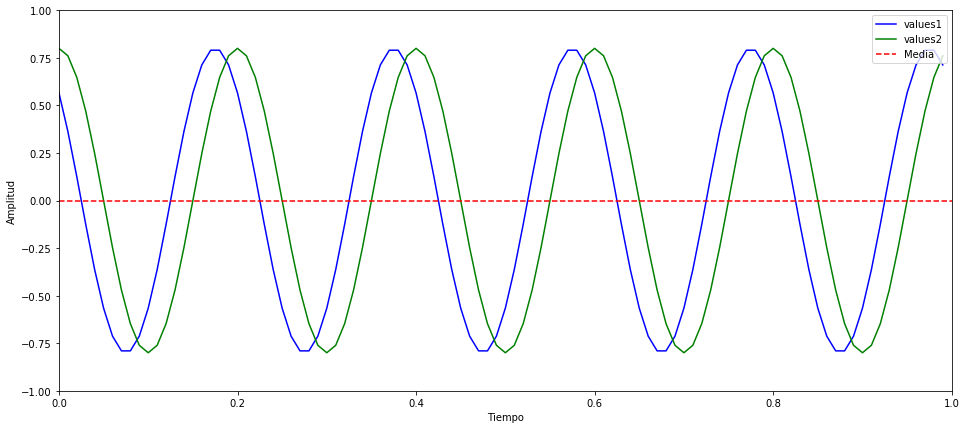

In [106]:
phi6 = 0
plot_waves(t, get_xvalues(t, A, f, phi), get_xvalues(t, A, f, phi6))

Sim desplazamiento sobre la fase el primer valor de la serie es igual al de la aplitud y la diferencia es mínima con la serie original.

### Ejercicio 7
Comparacion entra fase = π contra fase = 0, es la comparación de los resultados de los ejercicios 5 y 6.

Cantidad de registros 100
Values 
[-8.00000000e-01 -7.60845213e-01 -6.47213595e-01 -4.70228202e-01
 -2.47213595e-01 -1.46957616e-16  2.47213595e-01  4.70228202e-01
  6.47213595e-01  7.60845213e-01]
Cantidad de registros 100
Values 
[ 8.00000000e-01  7.60845213e-01  6.47213595e-01  4.70228202e-01
  2.47213595e-01  4.89858720e-17 -2.47213595e-01 -4.70228202e-01
 -6.47213595e-01 -7.60845213e-01]


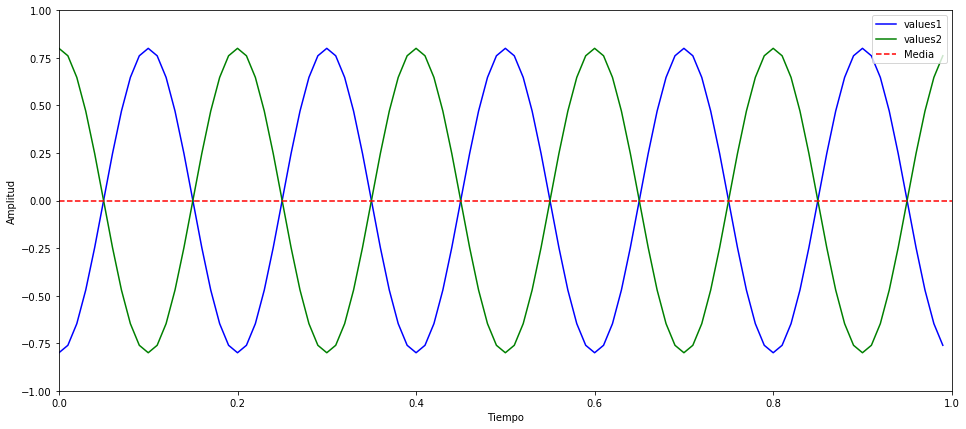

In [107]:
plot_waves(t, get_xvalues(t, A, f, phi5), get_xvalues(t, A, f, phi6))

### Ejercicio 8
Voy a variar un poco la amplitud y la frecuencia para generar efectos diferentes en el análisis. El valor de phi va ser cero(0) en todos los casos.

Cantidad de registros 100
Values 
[ 0.2 -0.2  0.2 -0.2  0.2 -0.2  0.2 -0.2  0.2 -0.2]


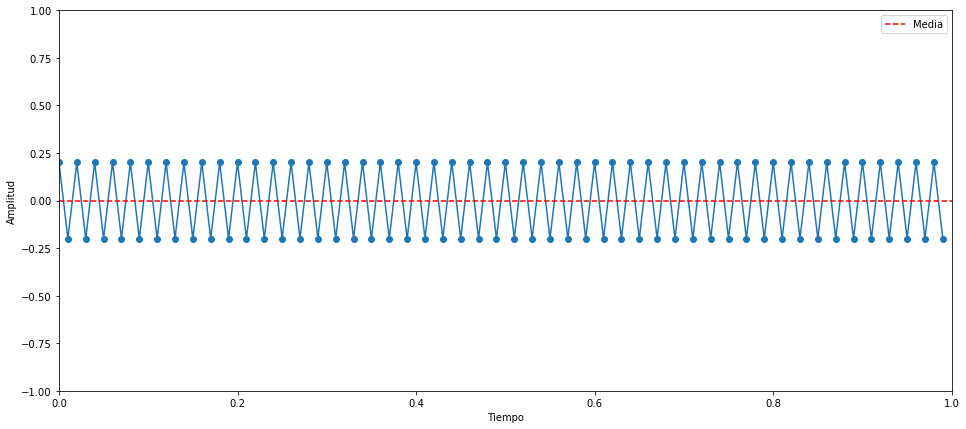

In [154]:
A8 = .2
f8 = 50
serie8 = get_xvalues(t, A8, f8, phi6)
plot_wave(t, serie8)

### Ejercicio 9

Cantidad de registros 100
Values 
[ 0.7        0.5663119  0.2163119 -0.2163119 -0.5663119 -0.7
 -0.5663119 -0.2163119  0.2163119  0.5663119]


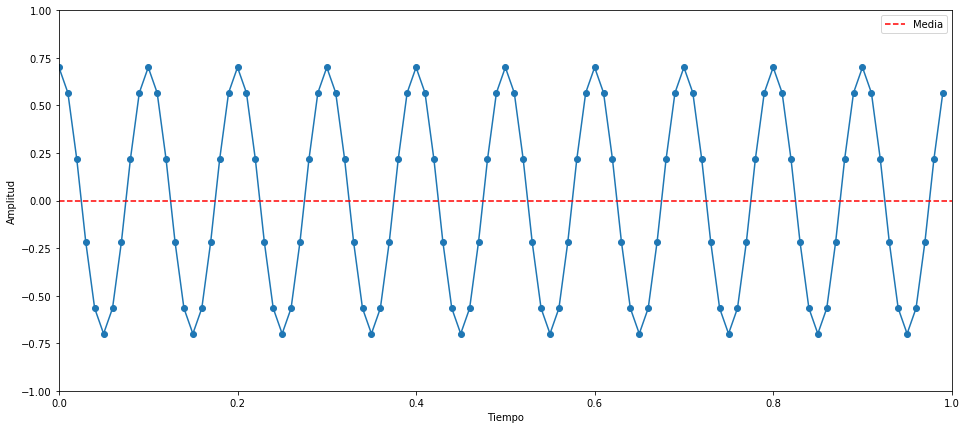

In [155]:
A9 = .7
f9 = 10
serie9 = get_xvalues(t, A9, f9, phi6)
plot_wave(t, serie9)

### Ejercicio 10

Cantidad de registros 100
Values 
[ 0.8       -0.6472136  0.2472136  0.2472136 -0.6472136  0.8
 -0.6472136  0.2472136  0.2472136 -0.6472136]


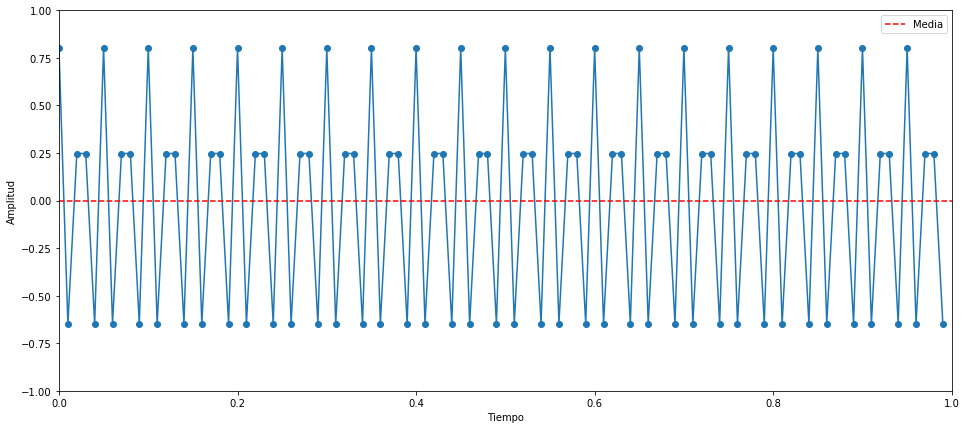

In [156]:
A10 = .8
f10 = 60
serie10 = get_xvalues(t, A10, f10, phi6)
plot_wave(t, serie10)

### Ejercicio 11

Cantidad de registros 100
Values 
[0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9]


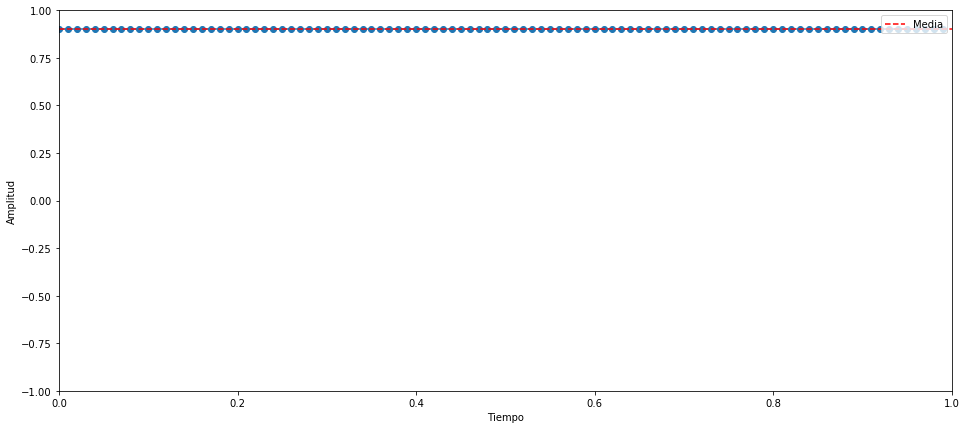

In [157]:
A11 = .9
f11 = 100
serie11 = get_xvalues(t, A11, f11, phi6)
plot_wave(t, serie11)

### Ejercicio 12

Cantidad de registros 100
Values 
[0.6        0.59881604 0.59526882 0.58937235 0.5811499  0.57063391
 0.55786589 0.54289623 0.52578401 0.50659676]


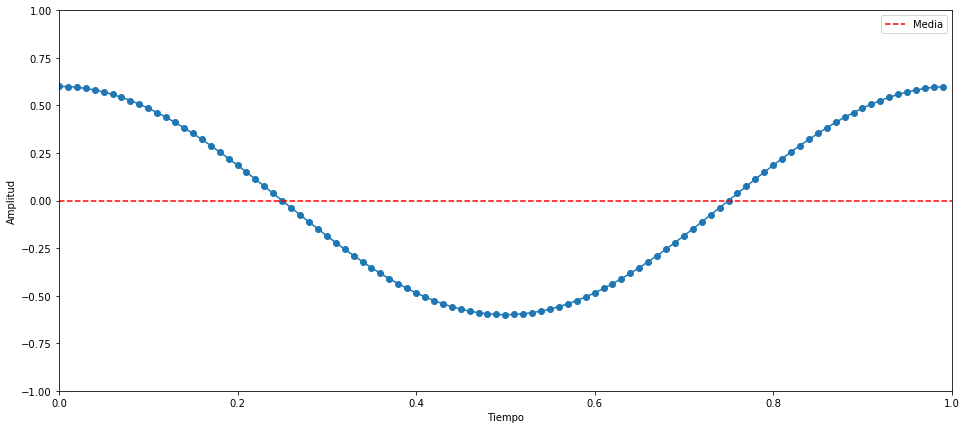

In [161]:
A12 = .6
f12 = 1
serie12 = get_xvalues(t, A12, f12, phi6)
plot_wave(t, serie12)

### Ejercicio 13

Cantidad de registros 100
Values 
[ 0.9        -0.27811529 -0.72811529  0.72811529  0.27811529 -0.9
  0.27811529  0.72811529 -0.72811529 -0.27811529]


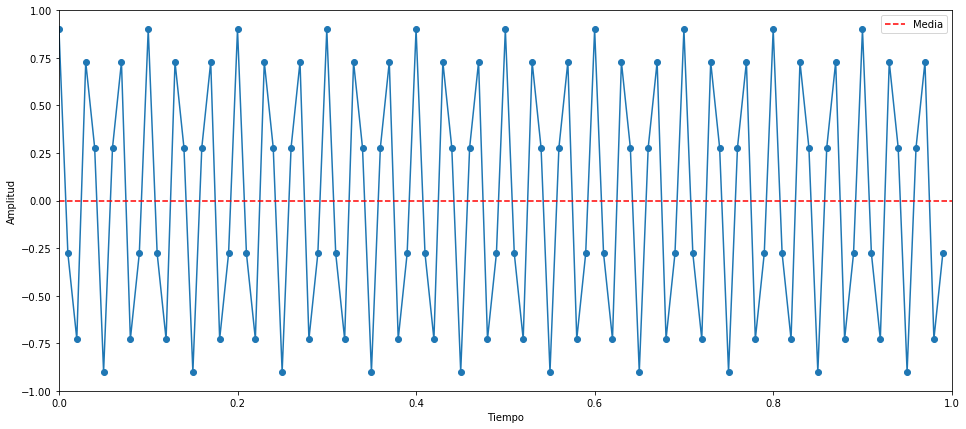

In [162]:
A13 = .9
f13 = 30
serie13 = get_xvalues(t, A13, f13, phi6)
plot_wave(t, serie13)

En este ejercicio se puede ver una señal sin desplazamiento y otra con un desplazamiento completo de la fase, la señal 1 inicia con valores con amplitud de 8 mientras la desplazada inicia en -8.  

## Stationary
Para probar la propiedad de stationary de las series voy a usar como ejemplo la serie original con desplazamiento de π/4 y los desplazamientos de los ejercicios 5 y 6.

In [120]:
serie1 = get_xvalues(t, A, f, phi)
serie2 = get_xvalues(t, A2, f2, phi)
serie3 = get_xvalues(t, A3, f3, phi)
serie5 = get_xvalues(t, A, f, phi5)
serie6 = get_xvalues(t, A, f, phi6)

Cantidad de registros 100
Values 
[ 0.56568542  0.3631924   0.12514757 -0.12514757 -0.3631924  -0.56568542
 -0.71280522 -0.79015067 -0.79015067 -0.71280522]
Cantidad de registros 100
Values 
[ 0.21213203  0.06544297 -0.10162138 -0.2370465  -0.29866859 -0.26730196
 -0.15271242  0.00942323  0.16862501  0.27532639]
Cantidad de registros 100
Values 
[ 0.70003571 -0.44945059 -0.97781146 -0.15487012  0.88209646  0.70003571
 -0.44945059 -0.97781146 -0.15487012  0.88209646]
Cantidad de registros 100
Values 
[-8.00000000e-01 -7.60845213e-01 -6.47213595e-01 -4.70228202e-01
 -2.47213595e-01 -1.46957616e-16  2.47213595e-01  4.70228202e-01
  6.47213595e-01  7.60845213e-01]
Cantidad de registros 100
Values 
[ 8.00000000e-01  7.60845213e-01  6.47213595e-01  4.70228202e-01
  2.47213595e-01  4.89858720e-17 -2.47213595e-01 -4.70228202e-01
 -6.47213595e-01 -7.60845213e-01]


Defino la función para calcular la propiedad stationary.

In [116]:
def get_stationary(series):
    adf_result = adfuller(series)
    print('ADF Statistics: %f'%adf_result[0])
    print('p-value: %f'%adf_result[1])
    print('Critical values:')
    for key, value in adf_result[4].items():
        print('\t%s: %.3f'%(key, value))
    
    if adf_result[0] < adf_result[4]['5%']:
        print('Rejected H0 - Time Series is Stationary')
    else:
        print('Failed to reject H0 - Time Series is Non-Stationary')

In [117]:
get_stationary(serie1)

ADF Statistics: -228112092744716.562500
p-value: 0.000000
Critical values:
	1%: -3.499
	5%: -2.892
	10%: -2.583
Rejected H0 - Time Series is Stationary


In [122]:
get_stationary(serie2)

ADF Statistics: -807275458896728.000000
p-value: 0.000000
Critical values:
	1%: -3.508
	5%: -2.895
	10%: -2.585
Rejected H0 - Time Series is Stationary


In [121]:
get_stationary(serie3)

ADF Statistics: -1853610515351898.000000
p-value: 0.000000
Critical values:
	1%: -3.499
	5%: -2.892
	10%: -2.583
Rejected H0 - Time Series is Stationary


In [118]:
get_stationary(serie5)

ADF Statistics: -338735952836884.312500
p-value: 0.000000
Critical values:
	1%: -3.499
	5%: -2.892
	10%: -2.583
Rejected H0 - Time Series is Stationary


In [119]:
get_stationary(serie6)

ADF Statistics: -815928384444019.625000
p-value: 0.000000
Critical values:
	1%: -3.500
	5%: -2.892
	10%: -2.583
Rejected H0 - Time Series is Stationary


In [163]:
get_stationary(serie8)

ADF Statistics: -22532004979363740.000000
p-value: 0.000000
Critical values:
	1%: -3.505
	5%: -2.894
	10%: -2.584
Rejected H0 - Time Series is Stationary


In [164]:
get_stationary(serie9)

ADF Statistics: -885272797996632.875000
p-value: 0.000000
Critical values:
	1%: -3.499
	5%: -2.892
	10%: -2.583
Rejected H0 - Time Series is Stationary


In [165]:
get_stationary(serie10)

ADF Statistics: -332689428204716.187500
p-value: 0.000000
Critical values:
	1%: -3.499
	5%: -2.892
	10%: -2.583
Rejected H0 - Time Series is Stationary


In [166]:
get_stationary(serie11)

ADF Statistics: nan
p-value: nan
Critical values:
	1%: -3.498
	5%: -2.891
	10%: -2.583
Failed to reject H0 - Time Series is Non-Stationary


/home/avelezd/code/miniconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:889: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/home/avelezd/code/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


In [167]:
get_stationary(serie12)

ADF Statistics: -442455125220158.750000
p-value: 0.000000
Critical values:
	1%: -3.507
	5%: -2.895
	10%: -2.585
Rejected H0 - Time Series is Stationary


In [168]:
get_stationary(serie13)

ADF Statistics: -1347226111294919.250000
p-value: 0.000000
Critical values:
	1%: -3.499
	5%: -2.892
	10%: -2.583
Rejected H0 - Time Series is Stationary


In [173]:
print('{0} | {1}'.format(A12, f12))

0.6 | 1


### Resultados ADF Test
En el siguiente cuadro resumo los resultados del test Augmented Dickey Fuller aplicado a las diferentes series:

| Nro. | Serie | A | f | phi | ADF Statistics | p-value | Critical 1% | Critical 5% | Critical 10% | Stationary |  
| :-: | :-: | :-: | :-: | :-: | -: | -: | -: | -: | -: | :-: |
| 1 | serie1 | 0.8 | 5 | np.pi/4 | -228112092744716.562500 | 0.000000 | -3.499 | -2.892 | -2.583 | True |
| 2 | serie2 | 0.3 | 9 | np.pi/4 | -807275458896728.000000 | 0.000000 | -3.508 | -2.895 | -2.585 | True |
| 3 | serie3 | 0.99 | 20 | np.pi/4 | -1853610515351898.000000 | 0.000000 | -3.499 | -2.892 | -2.583 | True |
| 4 | serie5 | 0.8 | 5 | np.pi | -338735952836884.312500 | 0.000000 | -3.499 | -2.892 | -2.583 | True |
| 5 | serie5 | 0.8 | 5 | 0 | -815928384444019.625000 | 0.000000 | -3.499 | -2.892 | -2.583 | True |
| 6 | serie6 | 0.8 | 5 | 0 | -815928384444019.625000 | 0.000000 | -3.499 | -2.892 | -2.583 | True |
| 7 | serie8 | 0.2 | 50 | 0 | -22532004979363740.000000 | 0.000000 | -3.505 | -2.894 | -2.584 | True |
| 8 | serie9 | 0.7 | 10 | 0 | -885272797996632.875000 | 0.000000 | -3.499 | -2.892 | -2.583 | True |
| 9 | serie10 | 0.8 | 30 | 0 | -332689428204716.187500 | 0.000000 | -3.499 | -2.892 | -2.583 | True |
| 10 | serie11 | 0.9 | 100 | 0 | nan | nan | -3.498 | -2.891 | -2.583 | False |
| 11 | serie12 | 0.6 | 1 | 0 | -442455125220158.750000 | 0.000000 | -3.499 | -2.895 | -2.585 | True |
| 12 | serie13 | 0.9 | 30 | 0 | -1347226111294919.250000 | 0.000000 | -3.499 | -2.892 | -2.583 | True |
| 13 | serie |  |  |  |  |  |  |  |  |  |
| 14 | serie |  |  |  |  |  |  |  |  |  |

Los valores criticos no varian excepto cuando cambio la frecuencia de la señal, el p-value se mantiene en 0 en todos los casos y el valor más alejado del valor crítico de 5% es que varia la frecuencia de la serie.
Si bien todos los valores están muy lejos del valor critico 5% que determina stationarity hay uno que está más alejado. Todavía no sé que significa esto pero lo resalto.

### ACF - Autocorrelation Function

La autocorrelación es una medida de asociación entre valores de series actuales y pasadas e indica cuáles son los valores de series pasadas más útiles para predecir valores futuros.

* **Función de autocorrelación (ACF)**: En el retardo (lag) k, es la autocorrelación entre los valores de las series que se encuentran a k intervalos de distancia.

La función que cálcula estos valores se define como:

In [142]:
def get_autocorrelation_function(dataset, nlags=100):
    ## Confidence intervals
    inf_confidence = -1.96/np.sqrt(len(dataset))
    sup_confidence = 1.96/np.sqrt(len(dataset))
    
    print('Invervalo de confianza superior: {0}'.format(sup_confidence))
    
    lag_acf = acf(dataset, nlags=nlags, fft=False)
    
    nucount=0
    for autocorr in lag_acf:
        print('Lag {0},{1}'.format(nucount, autocorr))
        nucount+=1
    
    #Plot PACF:
    plt.figure(figsize=(16, 7))
    plt.plot(lag_acf,marker='o')
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=inf_confidence, linestyle='--',color='gray')
    plt.axhline(y=sup_confidence, linestyle='--',color='gray')
    
    plt.title('Autocorrelation Function')
    plt.xlabel('number of lags')
    plt.ylabel('correlation')
    plt.tight_layout()

Este gráfico describe que tan bien está relacionado el valor actual de la serie con sus valores pasados.

Invervalo de confianza superior: 0.196
Lag 0,1.0
Lag 1,0.9384557811884525
Lag 2,0.7869588019645235
Lag 3,0.5620615247799494
Lag 4,0.28714574943699794
Lag 5,-0.010000000000000002
Lag 6,-0.29998653987540214
Lag 7,-0.5547304545757495
Lag 8,-0.7501734873478763
Lag 9,-0.8685515997723393
Lag 10,-0.8999999999999999
Lag 11,-0.8433501295589372
Lag 12,-0.7060571025270288
Lag 13,-0.503282999550702
Lag 14,-0.2562440499995031
Lag 15,0.010000000000000106
Lag 16,0.2690848404379074
Lag 17,0.49595192934650223
Lag 18,0.6692717879103817
Lag 19,0.7734459481428239
Lag 20,0.8
Lag 21,0.7482444779294218
Lag 22,0.625155403089534
Lag 23,0.4445044743214547
Lag 24,0.22534235056200827
Lag 25,-0.010000000000000238
Lag 26,-0.23818314100041282
Lag 27,-0.4371734041172551
Lag 28,-0.5883700884728871
Lag 29,-0.6783402965133087
Lag 30,-0.7000000000000001
Lag 31,-0.6531388262999065
Lag 32,-0.5442537036520394
Lag 33,-0.3857259490922073
Lag 34,-0.1944406511245135
Lag 35,0.010000000000000281
Lag 36,0.20728144156291814
Lag 37,

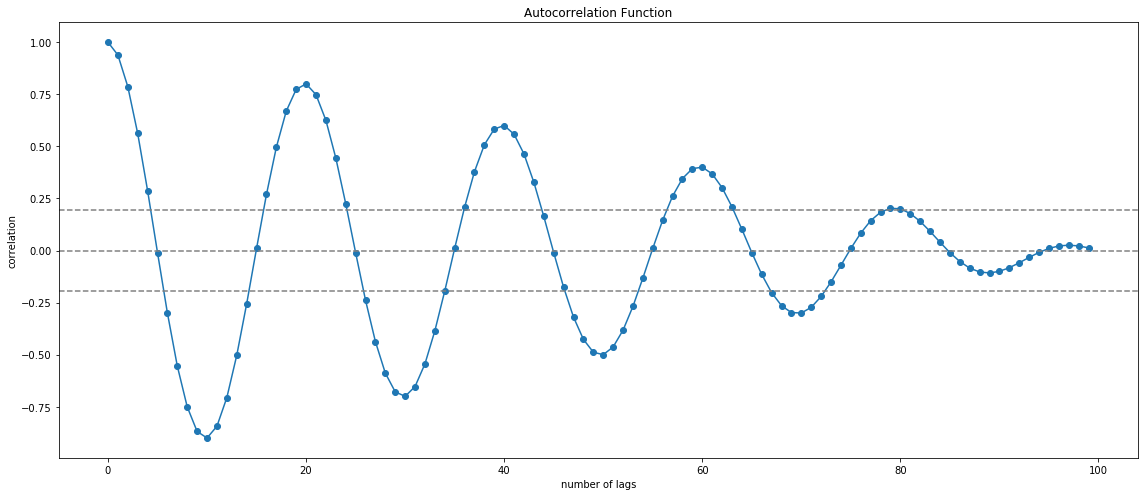

In [143]:
get_autocorrelation_function(serie1, 100)

Invervalo de confianza superior: 0.196
Lag 0,1.0
Lag 1,0.8305263782972049
Lag 2,0.4082154352091111
Lag 3,-0.13149438357051985
Lag 4,-0.6196321625864999
Lag 5,-0.9065938604241454
Lag 6,-0.9079812725892649
Lag 7,-0.6293391222394664
Lag 8,-0.16256793691157992
Lag 9,0.3442911078019393
Lag 10,0.7339931474603772
Lag 11,0.8888716934964549
Lag 12,0.7663323416975829
Lag 13,0.4103626296680539
Lag 14,-0.063980114079492
Lag 15,-0.5077076343923513
Lag 16,-0.7846934936729778
Lag 17,-0.8134246049589544
Lag 18,-0.5909088034262708
Lag 19,-0.19175297699224644
Lag 20,0.25672416066290904
Lag 21,0.6150797016903601
Lag 22,0.7751027993609357
Lag 23,0.6924590374831847
Lag 24,0.39878508492901776
Lag 25,-0.009999999999999322
Lag 26,-0.404955107539477
Lag 27,-0.6647815412158447
Lag 28,-0.7130692526107812
Lag 29,-0.5406901624733241
Lag 30,-0.20680133089951255
Lag 31,0.18128185375503517
Lag 32,0.502544137705846
Lag 33,0.6600062711340785
Lag 34,0.6099712351593995
Lag 35,0.37397024404635887
Lag 36,0.0302056652144789

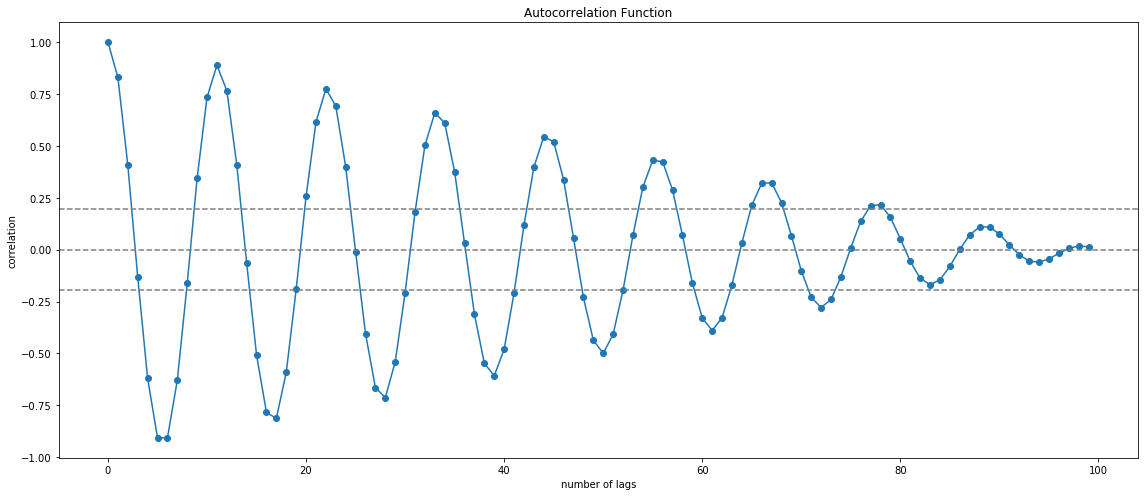

In [144]:
get_autocorrelation_function(serie2, 100)

En el caso en el que se redujo la amplitud, la similitud del lag siguiente al estado inicial decae muy rapidamente, es decir que en comportamiento de la serie varía considerablemente desde el lag anterior, la forma cae paridamente y se puede ver que el lag 5 es completamente opuesto al valor actual debido a la forma sinusoidal del ejemplo, denuevo aumenta ls similitud hasta los lags 10 y 11 que es en donde se parece más al estado actual, todo esto tiene mucho sentido por la forma de serie original. Lo importante a resaltar en este caso es que el valor del lag 1 despues del estado actual es menos similar que el lag 11, quiere decir que el comportamiento de la serie cambia muy rápido.

Invervalo de confianza superior: 0.196
Lag 0,1.0
Lag 1,0.2964162592682465
Lag 2,-0.7987145070103732
Lag 3,-0.7788686320207744
Lag 4,0.30616687976290086
Lag 5,0.9500000000000002
Lag 6,0.28096540954949933
Lag 7,-0.7582636572916257
Lag 8,-0.738417782302027
Lag 9,0.29071603004415336
Lag 10,0.8999999999999997
Lag 11,0.265514559830752
Lag 12,-0.7178128075728781
Lag 13,-0.6979669325832798
Lag 14,0.2752651803254057
Lag 15,0.85
Lag 16,0.2500637101120051
Lag 17,-0.6773619578541303
Lag 18,-0.6575160828645326
Lag 19,0.2598143306066581
Lag 20,0.7999999999999997
Lag 21,0.2346128603932577
Lag 22,-0.636911108135383
Lag 23,-0.6170652331457852
Lag 24,0.2443634808879105
Lag 25,0.7499999999999998
Lag 26,0.2191620106745106
Lag 27,-0.5964602584166352
Lag 28,-0.5766143834270379
Lag 29,0.2289126311691626
Lag 30,0.6999999999999997
Lag 31,0.20371116095576344
Lag 32,-0.556009408697888
Lag 33,-0.5361635337082907
Lag 34,0.21346178145041542
Lag 35,0.6499999999999998
Lag 36,0.1882603112370162
Lag 37,-0.5155585589791

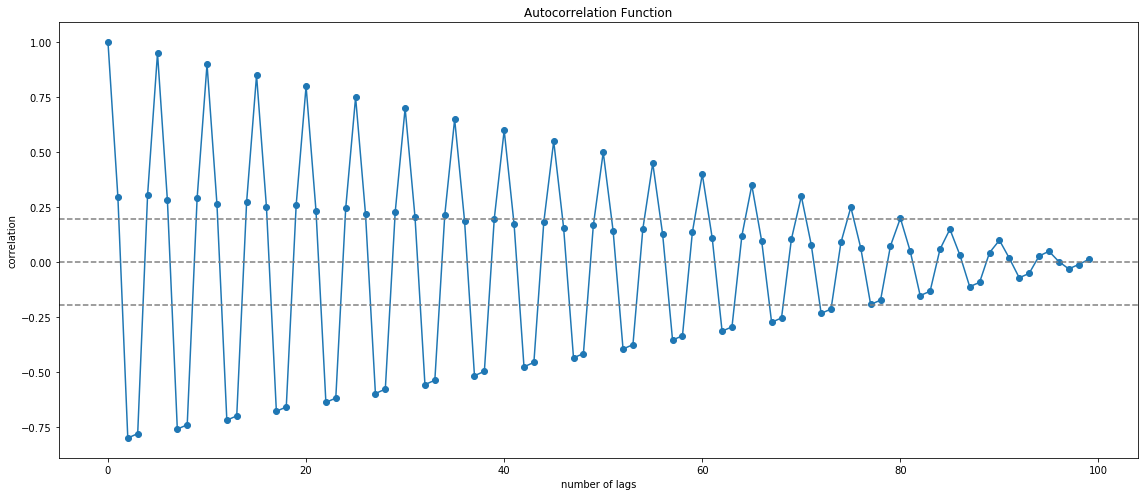

In [145]:
get_autocorrelation_function(serie3, 100)

Para la serie con aumento de frecuencia se puede ver que el cambio es más pronunciado, la diferencia entre el estado inicial y el siguiente lag es mucha, muentras que el lag 5 se parece mucho al estado inicial.

Invervalo de confianza superior: 0.196
Lag 0,1.0
Lag 1,0.9320353859692506
Lag 2,0.7747464845436991
Lag 3,0.5452527118748712
Lag 4,0.26738580476870116
Lag 5,-0.03077683537175254
Lag 6,-0.319746484543699
Lag 7,-0.5715392674808277
Lag 8,-0.7623858047687007
Lag 9,-0.8749719949915411
Lag 10,-0.9000000000000001
Lag 11,-0.8369297343397349
Lag 12,-0.6938447851062044
Lag 13,-0.486474186645624
Lag 14,-0.23648410533120656
Lag 15,0.03077683537175234
Lag 16,0.28884478510620404
Lag 17,0.5127607422515804
Lag 18,0.6814841053312064
Lag 19,0.779866343362026
Lag 20,0.8
Lag 21,0.7418240827102197
Lag 22,0.6129430856687096
Lag 23,0.42769566141637666
Lag 24,0.20558240589371185
Lag 25,-0.030776835371752312
Lag 26,-0.2579430856687093
Lag 27,-0.4539822170223329
Lag 28,-0.6005824058937114
Lag 29,-0.6847606917325105
Lag 30,-0.7000000000000001
Lag 31,-0.6467184310807045
Lag 32,-0.532041386231215
Lag 33,-0.36891713618712946
Lag 34,-0.17468070645621717
Lag 35,0.0307768353717523
Lag 36,0.2270413862312145
Lag 37,0.395

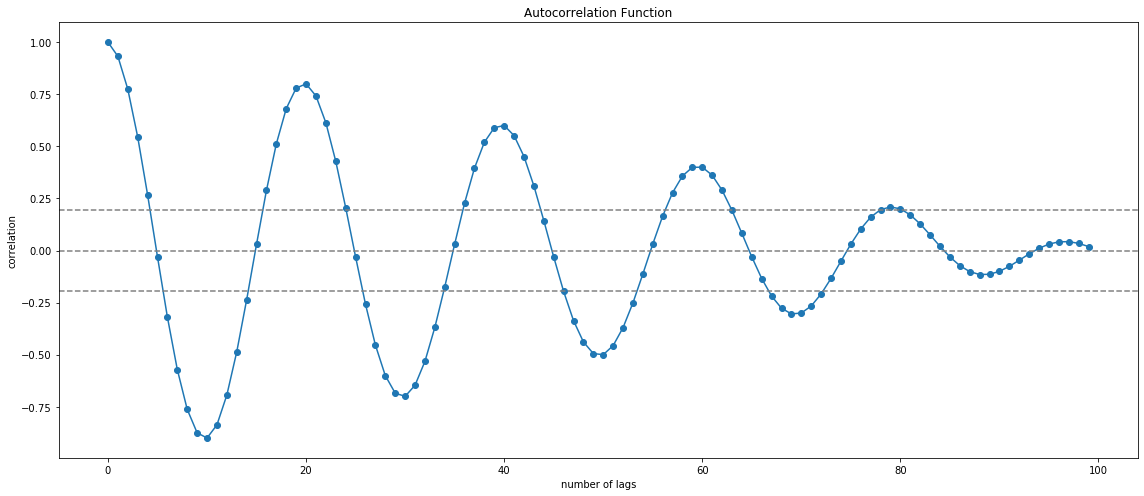

In [146]:
get_autocorrelation_function(serie5, 100)

Invervalo de confianza superior: 0.196
Lag 0,1.0
Lag 1,0.9320353859692504
Lag 2,0.774746484543699
Lag 3,0.5452527118748712
Lag 4,0.26738580476870116
Lag 5,-0.030776835371752475
Lag 6,-0.3197464845436989
Lag 7,-0.571539267480828
Lag 8,-0.762385804768701
Lag 9,-0.8749719949915413
Lag 10,-0.9000000000000001
Lag 11,-0.8369297343397349
Lag 12,-0.6938447851062043
Lag 13,-0.48647418664562386
Lag 14,-0.23648410533120642
Lag 15,0.030776835371752412
Lag 16,0.28884478510620415
Lag 17,0.5127607422515804
Lag 18,0.6814841053312063
Lag 19,0.779866343362026
Lag 20,0.8
Lag 21,0.7418240827102197
Lag 22,0.6129430856687097
Lag 23,0.4276956614163766
Lag 24,0.20558240589371182
Lag 25,-0.030776835371752378
Lag 26,-0.2579430856687094
Lag 27,-0.4539822170223331
Lag 28,-0.6005824058937114
Lag 29,-0.6847606917325105
Lag 30,-0.7000000000000001
Lag 31,-0.6467184310807045
Lag 32,-0.5320413862312149
Lag 33,-0.36891713618712935
Lag 34,-0.17468070645621706
Lag 35,0.030776835371752378
Lag 36,0.22704138623121456
Lag 37,

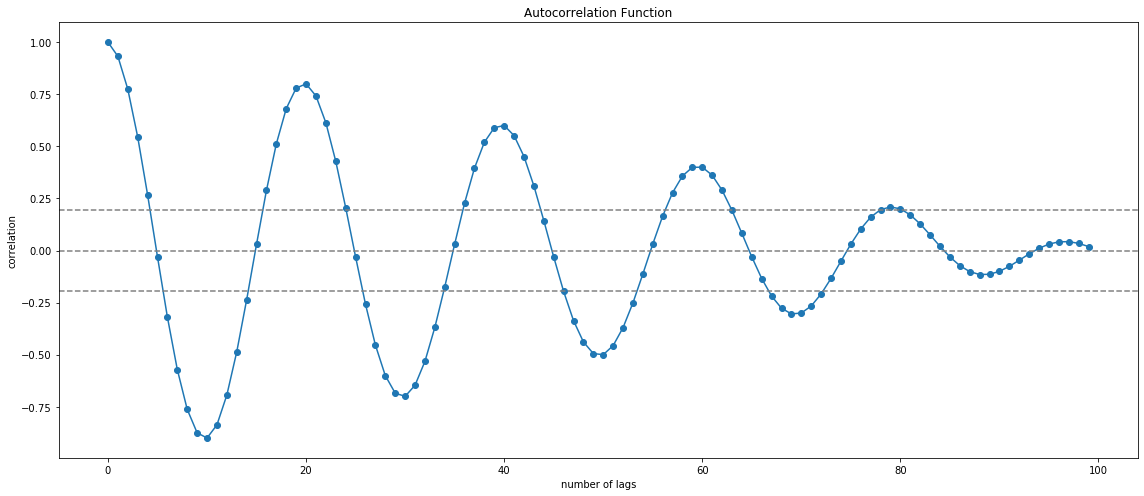

In [147]:
get_autocorrelation_function(serie6, 100)

Las series que no tuvieron alteración de amplitud y frecuencia se mantienen muy similares en lag primos al estado actual, incluso 2 lags despues supera la similitud de los lags posteriores donde se repite la forma de la serie.

Invervalo de confianza superior: 0.196
Lag 0,1.0
Lag 1,-0.9900000000000001
Lag 2,0.98
Lag 3,-0.97
Lag 4,0.9600000000000001
Lag 5,-0.9500000000000002
Lag 6,0.9400000000000001
Lag 7,-0.93
Lag 8,0.9200000000000002
Lag 9,-0.91
Lag 10,0.9000000000000001
Lag 11,-0.89
Lag 12,0.88
Lag 13,-0.8700000000000001
Lag 14,0.86
Lag 15,-0.8500000000000001
Lag 16,0.84
Lag 17,-0.8300000000000001
Lag 18,0.8200000000000001
Lag 19,-0.8099999999999999
Lag 20,0.8
Lag 21,-0.7900000000000001
Lag 22,0.78
Lag 23,-0.77
Lag 24,0.7600000000000001
Lag 25,-0.7500000000000001
Lag 26,0.7400000000000001
Lag 27,-0.7300000000000001
Lag 28,0.72
Lag 29,-0.7100000000000001
Lag 30,0.7000000000000001
Lag 31,-0.6900000000000001
Lag 32,0.68
Lag 33,-0.6699999999999999
Lag 34,0.66
Lag 35,-0.65
Lag 36,0.64
Lag 37,-0.6300000000000001
Lag 38,0.6200000000000001
Lag 39,-0.6100000000000001
Lag 40,0.6000000000000001
Lag 41,-0.5900000000000001
Lag 42,0.5800000000000001
Lag 43,-0.5700000000000001
Lag 44,0.56
Lag 45,-0.55
Lag 46,0.54
Lag 47,-

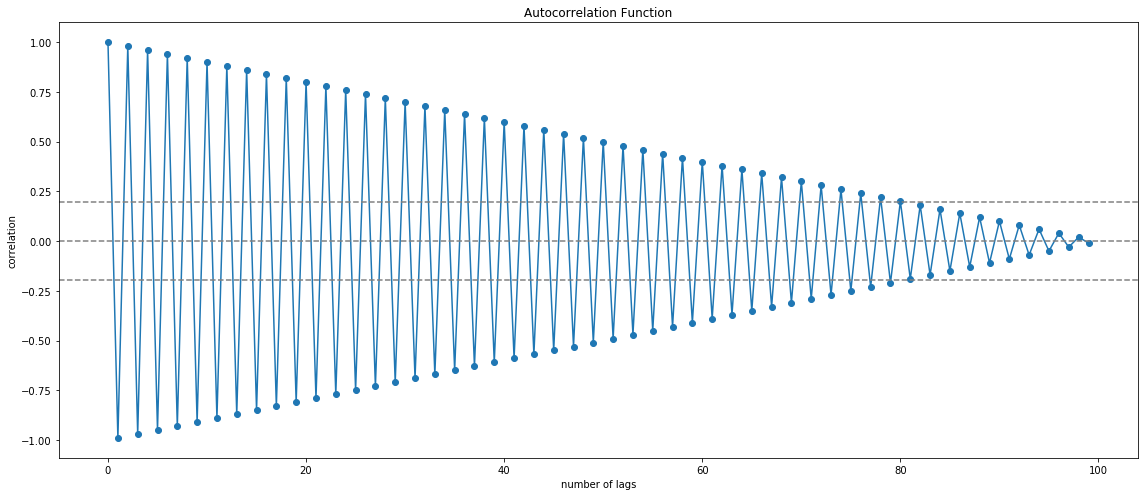

In [174]:
get_autocorrelation_function(serie8, 100)

Invervalo de confianza superior: 0.196
Lag 0,1.0
Lag 1,0.7928366544874488
Lag 2,0.2897464845436991
Lag 3,-0.31283665448744835
Lag 4,-0.7847464845436989
Lag 5,-0.9500000000000001
Lag 6,-0.7523858047687015
Lag 7,-0.2742956348249518
Lag 8,0.297385804768701
Lag 9,0.7442956348249514
Lag 10,0.8999999999999998
Lag 11,0.711934955049954
Lag 12,0.25884478510620446
Lag 13,-0.2819349550499534
Lag 14,-0.703844785106204
Lag 15,-0.85
Lag 16,-0.6714841053312066
Lag 17,-0.24339393538745716
Lag 18,0.2664841053312062
Lag 19,0.6633939353874568
Lag 20,0.8
Lag 21,0.631033255612459
Lag 22,0.22794308566870963
Lag 23,-0.2510332556124588
Lag 24,-0.6229430856687094
Lag 25,-0.7499999999999999
Lag 26,-0.5905824058937117
Lag 27,-0.2124922359499624
Lag 28,0.2355824058937114
Lag 29,0.5824922359499619
Lag 30,0.7
Lag 31,0.5501315561749643
Lag 32,0.197041386231215
Lag 33,-0.220131556174964
Lag 34,-0.5420413862312147
Lag 35,-0.6499999999999999
Lag 36,-0.509680706456217
Lag 37,-0.18159053651246754
Lag 38,0.204680706456216

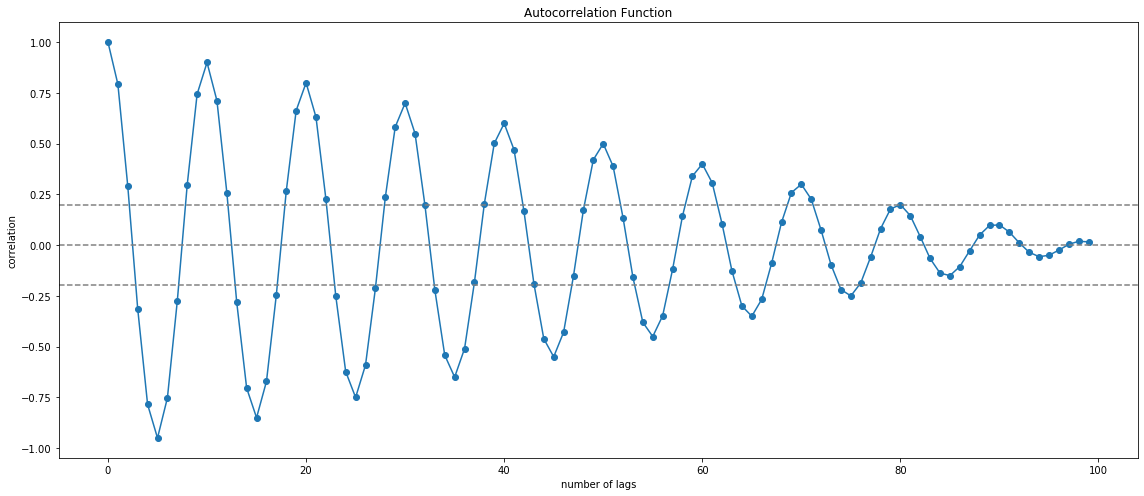

In [175]:
get_autocorrelation_function(serie9, 100)

Invervalo de confianza superior: 0.196
Lag 0,1.0
Lag 1,-0.7928366544874491
Lag 2,0.28974648454370017
Lag 3,0.3128366544874468
Lag 4,-0.7847464845436977
Lag 5,0.9499999999999997
Lag 6,-0.7523858047687023
Lag 7,0.2742956348249542
Lag 8,0.29738580476869775
Lag 9,-0.7442956348249491
Lag 10,0.8999999999999997
Lag 11,-0.711934955049956
Lag 12,0.258844785106208
Lag 13,0.28193495504994964
Lag 14,-0.703844785106201
Lag 15,0.8499999999999993
Lag 16,-0.6714841053312091
Lag 17,0.24339393538746162
Lag 18,0.26648410533120115
Lag 19,-0.6633939353874538
Lag 20,0.7999999999999999
Lag 21,-0.6310332556124623
Lag 22,0.22794308566871427
Lag 23,0.2510332556124539
Lag 24,-0.6229430856687062
Lag 25,0.7499999999999998
Lag 26,-0.5905824058937148
Lag 27,0.2124922359499681
Lag 28,0.23558240589370463
Lag 29,-0.5824922359499574
Lag 30,0.6999999999999997
Lag 31,-0.5501315561749686
Lag 32,0.1970413862312224
Lag 33,0.2201315561749567
Lag 34,-0.5420413862312101
Lag 35,0.65
Lag 36,-0.5096807064562215
Lag 37,0.1815905365

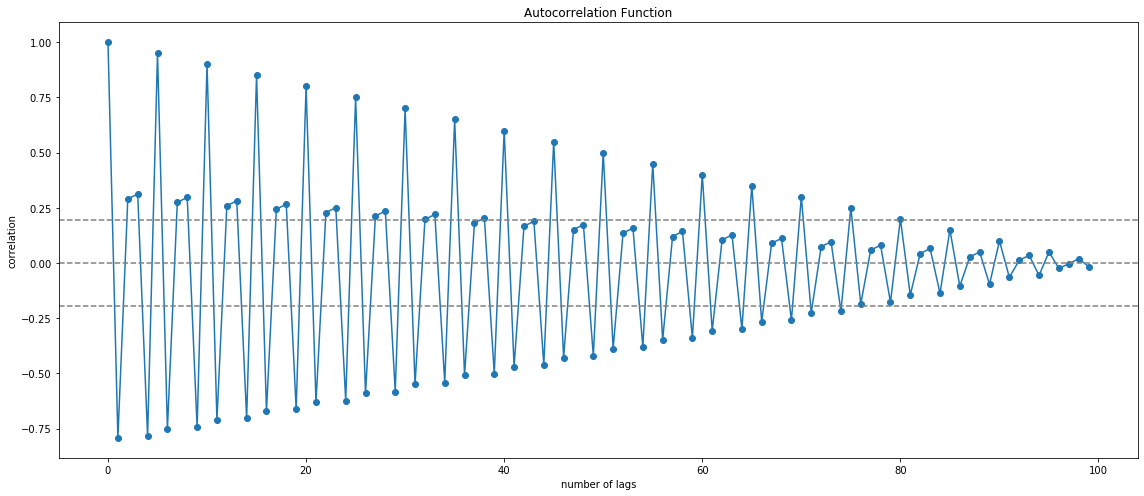

In [176]:
get_autocorrelation_function(serie10, 100)

Invervalo de confianza superior: 0.196
Lag 0,1.0
Lag 1,0.99
Lag 2,0.98
Lag 3,0.97
Lag 4,0.96
Lag 5,0.95
Lag 6,0.94
Lag 7,0.93
Lag 8,0.92
Lag 9,0.91
Lag 10,0.9
Lag 11,0.89
Lag 12,0.88
Lag 13,0.87
Lag 14,0.86
Lag 15,0.85
Lag 16,0.84
Lag 17,0.83
Lag 18,0.82
Lag 19,0.81
Lag 20,0.8
Lag 21,0.79
Lag 22,0.78
Lag 23,0.77
Lag 24,0.76
Lag 25,0.75
Lag 26,0.74
Lag 27,0.73
Lag 28,0.72
Lag 29,0.71
Lag 30,0.7
Lag 31,0.69
Lag 32,0.68
Lag 33,0.67
Lag 34,0.66
Lag 35,0.65
Lag 36,0.64
Lag 37,0.63
Lag 38,0.62
Lag 39,0.61
Lag 40,0.6
Lag 41,0.59
Lag 42,0.58
Lag 43,0.57
Lag 44,0.56
Lag 45,0.55
Lag 46,0.54
Lag 47,0.53
Lag 48,0.52
Lag 49,0.51
Lag 50,0.5
Lag 51,0.49
Lag 52,0.48
Lag 53,0.47
Lag 54,0.46
Lag 55,0.45
Lag 56,0.44
Lag 57,0.43
Lag 58,0.42
Lag 59,0.41
Lag 60,0.4
Lag 61,0.39
Lag 62,0.38
Lag 63,0.37
Lag 64,0.36
Lag 65,0.35
Lag 66,0.34
Lag 67,0.33
Lag 68,0.32
Lag 69,0.31
Lag 70,0.3
Lag 71,0.29
Lag 72,0.28
Lag 73,0.27
Lag 74,0.26
Lag 75,0.25
Lag 76,0.24
Lag 77,0.23
Lag 78,0.22
Lag 79,0.21
Lag 80,0.2
Lag 81,0

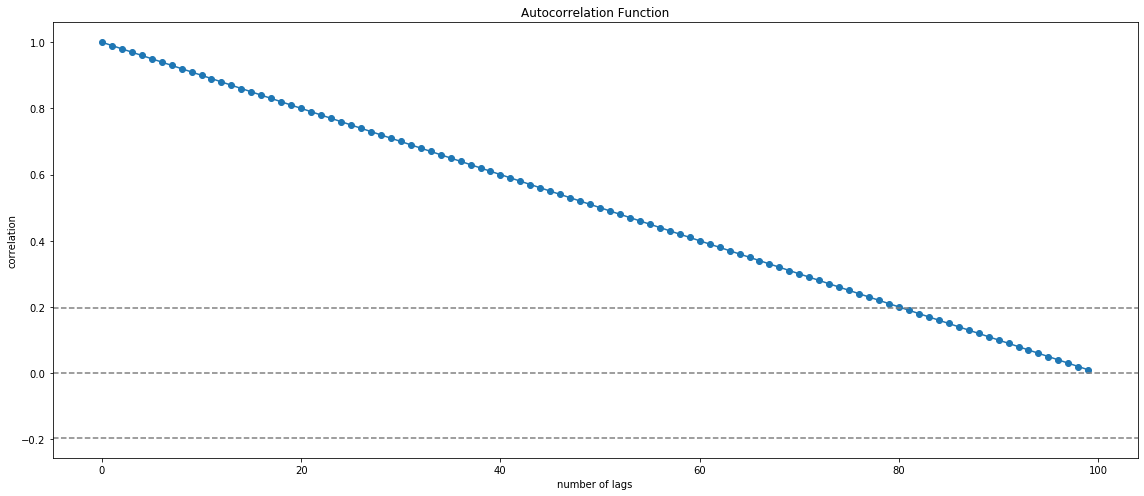

In [177]:
get_autocorrelation_function(serie11, 100)

Invervalo de confianza superior: 0.196
Lag 0,1.0
Lag 1,0.9780661938597065
Lag 2,0.9523512602750437
Lag 3,0.9230352261309757
Lag 4,0.8903117090459101
Lag 5,0.8543868457343051
Lag 6,0.8154781746272116
Lag 7,0.7738134783596956
Lag 8,0.7296295918732888
Lag 9,0.6831711819934507
Lag 10,0.6346895044261986
Lag 11,0.5844411441742915
Lag 12,0.5326867454016246
Lag 13,0.47968973677475363
Lag 14,0.4257150582829546
Lag 15,0.371027895483185
Lag 16,0.3158924270341617
Lag 17,0.2605705912750646
Lag 18,0.2053208774697235
Lag 19,0.1503971471773661
Lag 20,0.09604749102692166
Lag 21,0.04251312596451689
Lag 22,-0.009972662185777805
Lag 23,-0.061185526258495736
Lag 24,-0.1109110110615152
Lag 25,-0.15894544843865302
Lag 26,-0.20509679035548534
Lag 27,-0.24918537660495216
Lag 28,-0.2910446340643648
Lag 29,-0.3305217047827653
Lag 30,-0.3674780005354995
Lag 31,-0.4017896818496509
Lag 32,-0.43334805987788544
Lag 33,-0.46205991987750844
Lag 34,-0.48784776543433317
Lag 35,-0.5106499829555249
Lag 36,-0.53042092634008

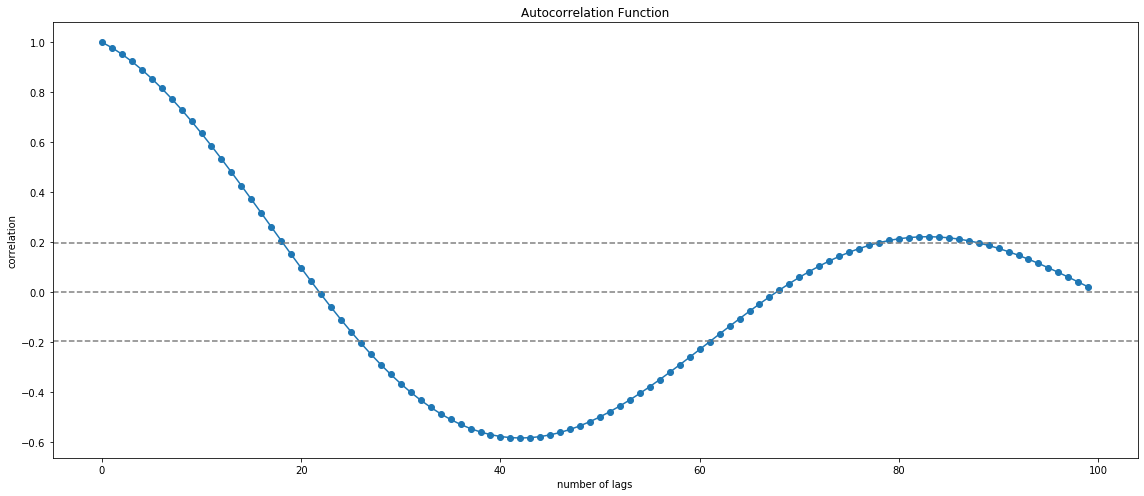

In [178]:
get_autocorrelation_function(serie12, 100)

Invervalo de confianza superior: 0.196
Lag 0,1.0
Lag 1,-0.302836654487448
Lag 2,-0.7947464845436997
Lag 3,0.7828366544874479
Lag 4,0.29974648454370045
Lag 5,-0.9500000000000005
Lag 6,0.28738580476869985
Lag 7,0.7542956348249528
Lag 8,-0.7423858047687001
Lag 9,-0.2842956348249532
Lag 10,0.9000000000000002
Lag 11,-0.27193495504995174
Lag 12,-0.7138447851062055
Lag 13,0.7019349550499522
Lag 14,0.2688447851062067
Lag 15,-0.8500000000000001
Lag 16,0.2564841053312034
Lag 17,0.6733939353874586
Lag 18,-0.6614841053312043
Lag 19,-0.2533939353874596
Lag 20,0.7999999999999997
Lag 21,-0.2410332556124558
Lag 22,-0.6329430856687108
Lag 23,0.6210332556124567
Lag 24,0.23794308566871267
Lag 25,-0.7499999999999993
Lag 26,0.22558240589370807
Lag 27,0.592492235949964
Lag 28,-0.5805824058937087
Lag 29,-0.22249223594996578
Lag 30,0.6999999999999994
Lag 31,-0.21013155617496024
Lag 32,-0.5520413862312167
Lag 33,0.5401315561749613
Lag 34,0.20704138623121865
Lag 35,-0.6499999999999995
Lag 36,0.1946807064562128


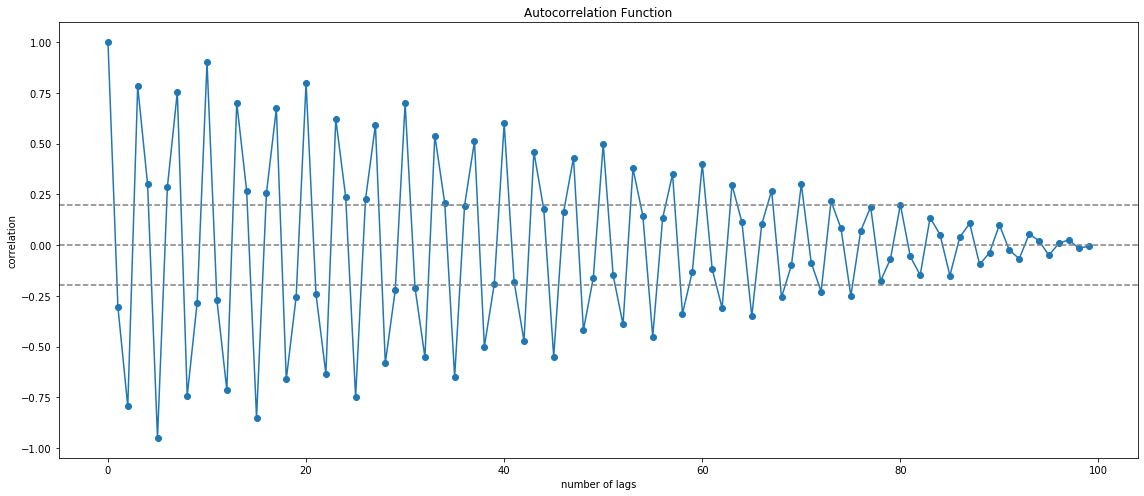

In [179]:
get_autocorrelation_function(serie13, 100)

El eje x del gráfico de ACF indica el lag en el que se calcula la autocorrelación; el eje y indica el valor de la correlación (entre -1 y 1). Por ejemplo, un trazo de unión en el retardo 1 de un gráfico de ACF indica que existe una fuerte correlación entre el valor de cada serie y el valor anterior, un trazo de unión en el retardo 2 indica que existe una fuerte correlación entre el valor de cada serie y el valor que aparece dos puntos anteriores, etc.

* Una **correlación positiva** indica que los valores grandes actuales se corresponden con valores grandes en el retardo especificado; una **correlación negativa** indica que los valores grandes actuales se corresponden con valores pequeños en el retardo especificado.
* El **valor absoluto** de una correlación es una medida de la fuerza de la asociación, con valores absolutos mayores que indican relaciones más fuertes.


### PACF - Partial AutoCorrelation Function
la autocorrelación parcial también es una medida de asociación entre valores de series actuales y pasadas para  determinar los valores de series pasadas más útiles para predecir valores futuros.

* **Función de autocorrelación parcial (PACF)**: En el lag k, es la autocorrelación entre los valores de las series que se encuentran a k intervalos de distancia, teniendo en cuenta los valores de los intervalos intermedios.



In [47]:
def get_partial_autocorrelation_function(dataset, nlags=99):
    ## Confidence intervals
    inf_confidence = -1.96/np.sqrt(len(dataset))
    sup_confidence = 1.96/np.sqrt(len(dataset))
      
    print('Invervalo de confianza superior: {0}'.format(sup_confidence))
    
    lag_pacf = pacf(dataset, nlags=nlags, method='ols')

    nucount=0
    for autocorr in lag_pacf:
        print('Lag {0} = {1}'.format(nucount, autocorr))
        nucount+=1
    
    #Plot PACF:
    plt.figure(figsize=(16, 7))
    plt.plot(lag_pacf, marker='o')
    plt.axhline(y=0,linestyle='--', color='gray')
    plt.axhline(y=inf_confidence, linestyle='--', color='gray')
    plt.axhline(y=sup_confidence, linestyle='--', color='gray')
    
    plt.title('Partial Autocorrelation Function')
    plt.xlabel('Number of lags')
    plt.ylabel('correlation')
    plt.tight_layout()

Invervalo de confianza superior: 0.196
Lag 0 = 1.0
Lag 1 = 0.9536229295591113
Lag 2 = -1.0
Lag 3 = -0.677145434292239
Lag 4 = -0.5180815635767257
Lag 5 = -0.42369387924364504
Lag 6 = -0.36046271507302874
Lag 7 = -0.3134063032962931
Lag 8 = -0.2742922596402917
Lag 9 = -0.23776412907378738
Lag 10 = -0.1999999999999999
Lag 11 = -0.15850941938252552
Lag 12 = -0.11253848571249381
Lag 13 = -0.06353919596346669
Lag 14 = -0.01500244422234808
Lag 15 = 0.028692622759061853
Lag 16 = 0.06385747042117042
Lag 17 = 0.08848080132188679
Lag 18 = 0.10219877914444864
Lag 19 = 0.10567294625501711
Lag 20 = 0.09999999999999998
Lag 21 = 0.08645968329955946
Lag 22 = 0.06656934694962899
Lag 23 = 0.042245520109903026
Lag 24 = 0.015848671060307
Lag 25 = -0.01001641656056728
Lag 26 = -0.0328913266141659
Lag 27 = -0.050848727789689144
Lag 28 = -0.06269107668364758
Lag 29 = -0.0679326083067967
Lag 30 = -0.06666666666666668
Lag 31 = -0.059441032268447144
Lag 32 = -0.0471970842835493
Lag 33 = -0.0312472007175534
Lag 

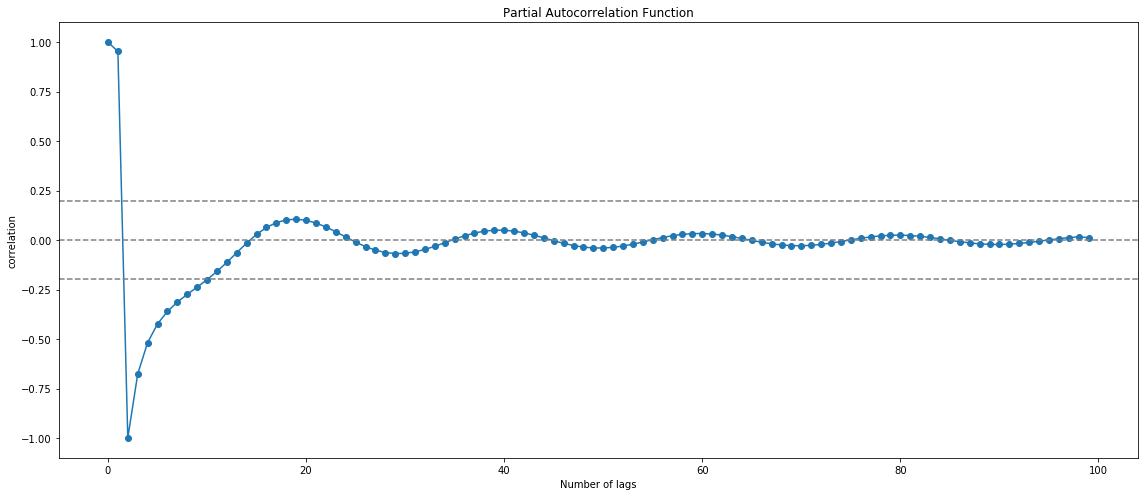

In [148]:
get_partial_autocorrelation_function(serie1, 99)

Invervalo de confianza superior: 0.196
Lag 0 = 1.0
Lag 1 = 0.8466776195830071
Lag 2 = -1.0000000000000007
Lag 3 = -0.6961292220095334
Lag 4 = -0.540307229417104
Lag 5 = -0.42503177570812334
Lag 6 = -0.3029028151265861
Lag 7 = -0.15453759806085202
Lag 8 = 0.0016090722237293367
Lag 9 = 0.12253556842649857
Lag 10 = 0.18252380876496055
Lag 11 = 0.183115592183026
Lag 12 = 0.1362727235062867
Lag 13 = 0.05870372426497969
Lag 14 = -0.025468199173636262
Lag 15 = -0.09062113244873576
Lag 16 = -0.12097691967882071
Lag 17 = -0.11356790221720842
Lag 18 = -0.07471440679286734
Lag 19 = -0.01788412092111398
Lag 20 = 0.03869962268169804
Lag 21 = 0.07818831010151357
Lag 22 = 0.09101862361545233
Lag 23 = 0.07623504601075917
Lag 24 = 0.040205939081891635
Lag 25 = -0.00507065072268071
Lag 26 = -0.04532014534998917
Lag 27 = -0.06892458573197047
Lag 28 = -0.07036643625277515
Lag 29 = -0.050835755329480536
Lag 30 = -0.017331522345287363
Lag 31 = 0.019286450080490354
Lag 32 = 0.047743421339244745
Lag 33 = 0.06

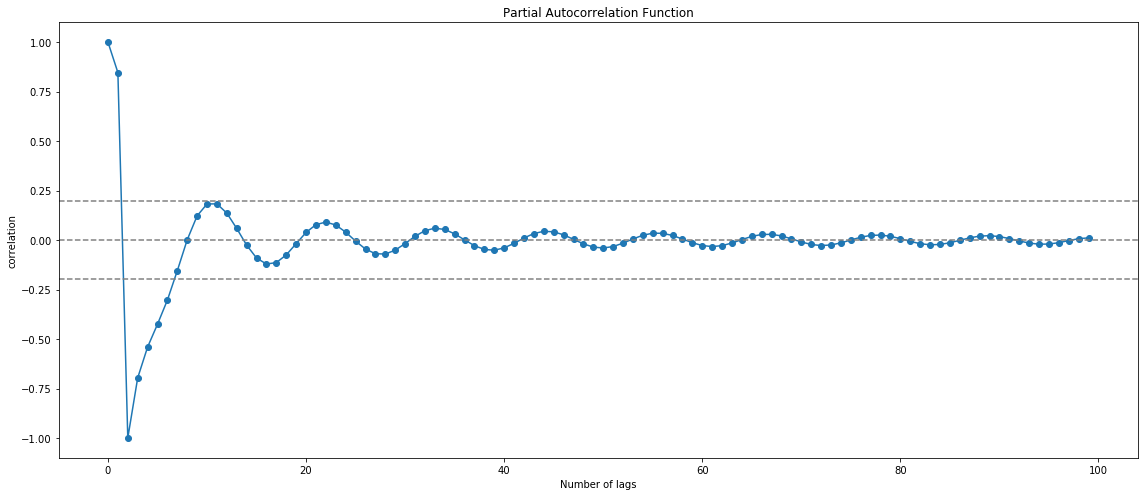

In [149]:
get_partial_autocorrelation_function(serie2, 99)

Invervalo de confianza superior: 0.196
Lag 0 = 1.0
Lag 1 = 0.301118386522877
Lag 2 = -0.9999999999999998
Lag 3 = -0.5189276302272174
Lag 4 = 0.20601132958329796
Lag 5 = 0.3999999999999999
Lag 6 = 0.08829056982141369
Lag 7 = -0.24082018485586268
Lag 8 = -0.19746454128039456
Lag 9 = 0.07725424859373678
Lag 10 = 0.20000000000000004
Lag 11 = 0.05150283239582465
Lag 12 = -0.1378543719502505
Lag 13 = -0.12248082458295333
Lag 14 = 0.04754107605768409
Lag 15 = 0.13333333333333333
Lag 16 = 0.03635494051469983
Lag 17 = -0.09662786290438577
Lag 18 = -0.08881657623334799
Lag 19 = 0.03433522159721632
Lag 20 = 0.10000000000000003
Lag 21 = 0.028092454034086254
Lag 22 = -0.07439489687141136
Lag 23 = -0.06967756179650388
Lag 24 = 0.026871042989125717
Lag 25 = 0.07999999999999989
Lag 26 = 0.02289014773147772
Lag 27 = -0.06048283414870522
Lag 28 = -0.05732765674761385
Lag 29 = 0.022072642455353206
Lag 30 = 0.06666666666666665
Lag 31 = 0.01931356214843436
Lag 32 = -0.05095558296095823
Lag 33 = -0.04869766

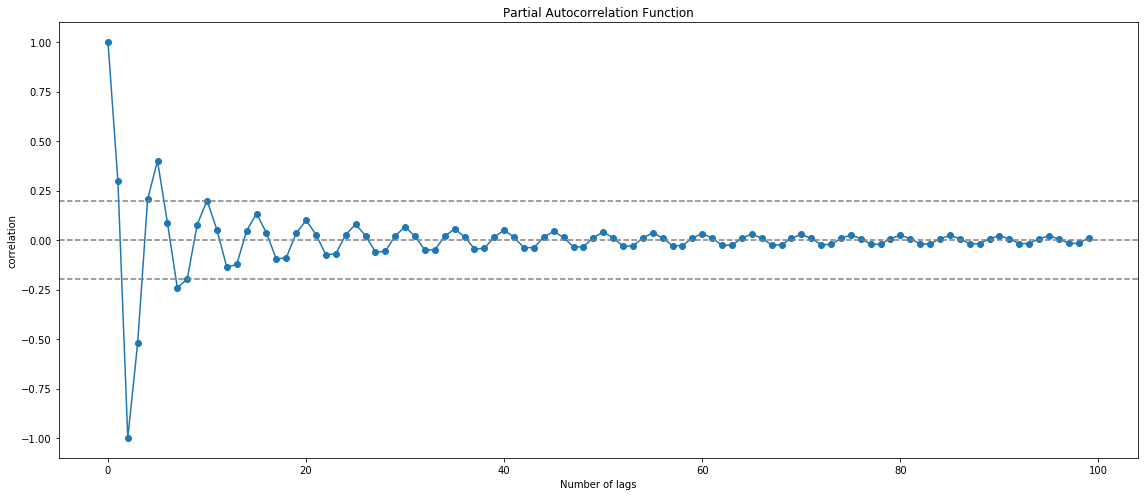

In [150]:
get_partial_autocorrelation_function(serie3, 99)

Invervalo de confianza superior: 0.196
Lag 0 = 1.0
Lag 1 = 0.9491876635849095
Lag 2 = -1.0
Lag 3 = -0.677145434292244
Lag 4 = -0.5180815635767206
Lag 5 = -0.42369387924364216
Lag 6 = -0.3604627150730306
Lag 7 = -0.3134063032962925
Lag 8 = -0.2742922596402933
Lag 9 = -0.23776412907378916
Lag 10 = -0.20000000000000012
Lag 11 = -0.15850941938252697
Lag 12 = -0.11253848571249482
Lag 13 = -0.06353919596346785
Lag 14 = -0.01500244422234931
Lag 15 = 0.02869262275906098
Lag 16 = 0.06385747042117068
Lag 17 = 0.0884808013218869
Lag 18 = 0.10219877914444865
Lag 19 = 0.10567294625501718
Lag 20 = 0.10000000000000006
Lag 21 = 0.08645968329955944
Lag 22 = 0.0665693469496289
Lag 23 = 0.04224552010990314
Lag 24 = 0.015848671060307448
Lag 25 = -0.010016416560567516
Lag 26 = -0.03289132661416662
Lag 27 = -0.05084872778968956
Lag 28 = -0.06269107668364754
Lag 29 = -0.06793260830679668
Lag 30 = -0.06666666666666661
Lag 31 = -0.05944103226844717
Lag 32 = -0.04719708428354935
Lag 33 = -0.03124720071755341
La

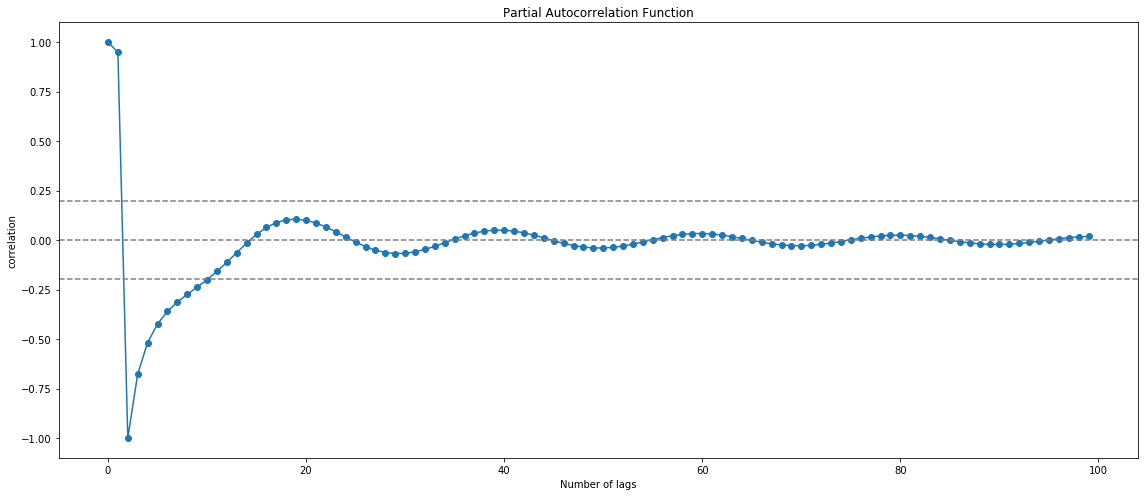

In [151]:
get_partial_autocorrelation_function(serie5, 99)

Invervalo de confianza superior: 0.196
Lag 0 = 1.0
Lag 1 = 0.9491876635849098
Lag 2 = -0.9999999999999998
Lag 3 = -0.67714543429224
Lag 4 = -0.518081563576722
Lag 5 = -0.42369387924364466
Lag 6 = -0.36046271507302924
Lag 7 = -0.31340630329629127
Lag 8 = -0.2742922596402922
Lag 9 = -0.237764129073789
Lag 10 = -0.19999999999999998
Lag 11 = -0.15850941938252563
Lag 12 = -0.11253848571249389
Lag 13 = -0.06353919596346722
Lag 14 = -0.015002444222347935
Lag 15 = 0.028692622759061315
Lag 16 = 0.06385747042117075
Lag 17 = 0.08848080132188697
Lag 18 = 0.10219877914444861
Lag 19 = 0.10567294625501703
Lag 20 = 0.09999999999999987
Lag 21 = 0.0864596832995594
Lag 22 = 0.06656934694962895
Lag 23 = 0.0422455201099031
Lag 24 = 0.015848671060307476
Lag 25 = -0.01001641656056746
Lag 26 = -0.03289132661416661
Lag 27 = -0.050848727789689595
Lag 28 = -0.06269107668364755
Lag 29 = -0.06793260830679668
Lag 30 = -0.06666666666666665
Lag 31 = -0.059441032268447144
Lag 32 = -0.047197084283549316
Lag 33 = -0.031

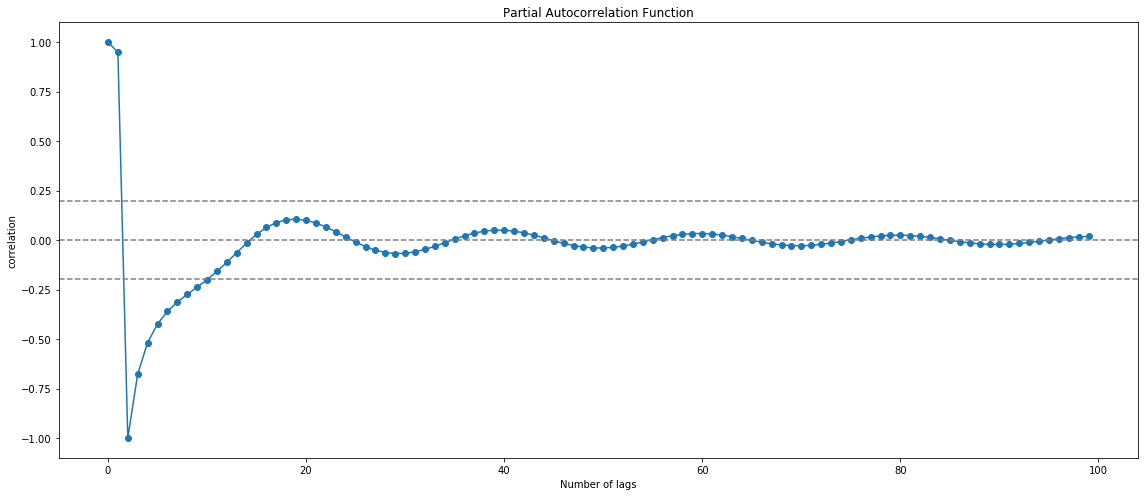

In [152]:
get_partial_autocorrelation_function(serie6, 99)

Invervalo de confianza superior: 0.196
Lag 0 = 1.0
Lag 1 = -1.0000000000000002
Lag 2 = 0.5
Lag 3 = -0.33333333333333587
Lag 4 = 0.2500000000000001
Lag 5 = -0.1999999999999999
Lag 6 = 0.16666666666666657
Lag 7 = -0.14285714285714265
Lag 8 = 0.125
Lag 9 = -0.11111111111111109
Lag 10 = 0.10000000000000002
Lag 11 = -0.09090909090909072
Lag 12 = 0.08333333333333333
Lag 13 = -0.07692307692307683
Lag 14 = 0.0714285714285714
Lag 15 = -0.06666666666666653
Lag 16 = 0.06250000000000001
Lag 17 = -0.058823529411764684
Lag 18 = 0.055555555555555546
Lag 19 = -0.05263157894736792
Lag 20 = 0.05000000000000001
Lag 21 = -0.04761904761904763
Lag 22 = 0.04545454545454546
Lag 23 = -0.04347826086956519
Lag 24 = 0.04166666666666667
Lag 25 = -0.039999999999999966
Lag 26 = 0.03846153846153843
Lag 27 = -0.037037037037037084
Lag 28 = 0.035714285714285705
Lag 29 = -0.034482758620689447
Lag 30 = 0.0333333333333333
Lag 31 = -0.032258064516129066
Lag 32 = 0.031249999999999983
Lag 33 = -0.030303030303030304
Lag 34 = 0

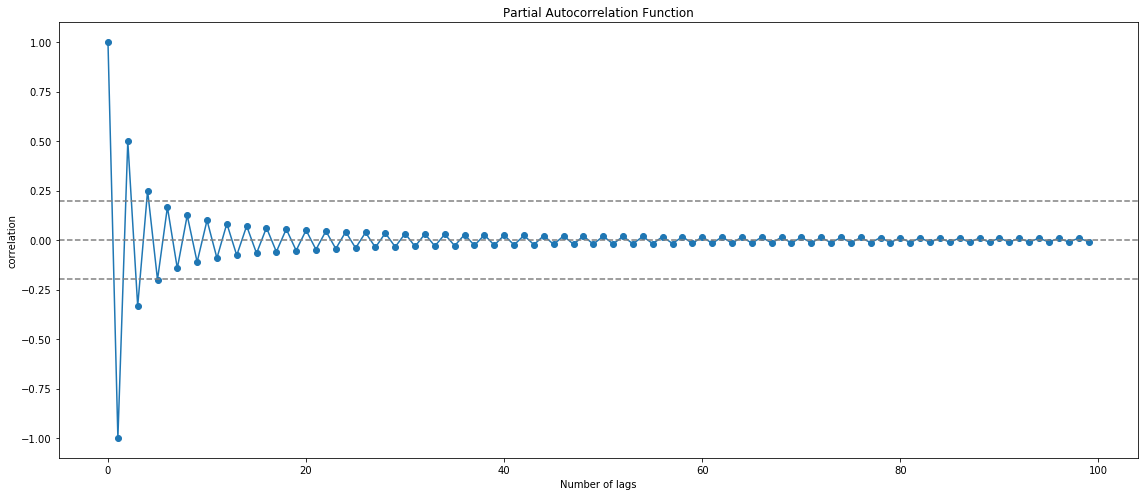

In [180]:
get_partial_autocorrelation_function(serie8, 99)

Invervalo de confianza superior: 0.196
Lag 0 = 1.0
Lag 1 = 0.803294695579543
Lag 2 = -0.9999999999999998
Lag 3 = -0.7007458120453938
Lag 4 = -0.5393446629166323
Lag 5 = -0.39999999999999936
Lag 6 = -0.23114771267855636
Lag 7 = -0.036829054035463646
Lag 8 = 0.12320077687578512
Lag 9 = 0.202254248593737
Lag 10 = 0.2
Lag 11 = 0.13483616572915808
Lag 12 = 0.033939080150201195
Lag 13 = -0.06402422148190182
Lag 14 = -0.12446415298076115
Lag 15 = -0.1333333333333333
Lag 16 = -0.09517846992646442
Lag 17 = -0.02754553273682201
Lag 18 = 0.04276109813133363
Lag 19 = 0.08989077715277194
Lag 20 = 0.10000000000000038
Lag 21 = 0.07354699948863162
Lag 22 = 0.022806657787199352
Lag 23 = -0.03197832907831366
Lag 24 = -0.07034930385869102
Lag 25 = -0.08000000000000006
Lag 26 = -0.059927184768514635
Lag 27 = -0.019368437496807805
Lag 28 = 0.025497114779150235
Lag 29 = 0.05778692816963904
Lag 30 = 0.06666666666666667
Lag 31 = 0.05056356214843419
Lag 32 = 0.01679984004246432
Lag 33 = -0.021183300475790555
L

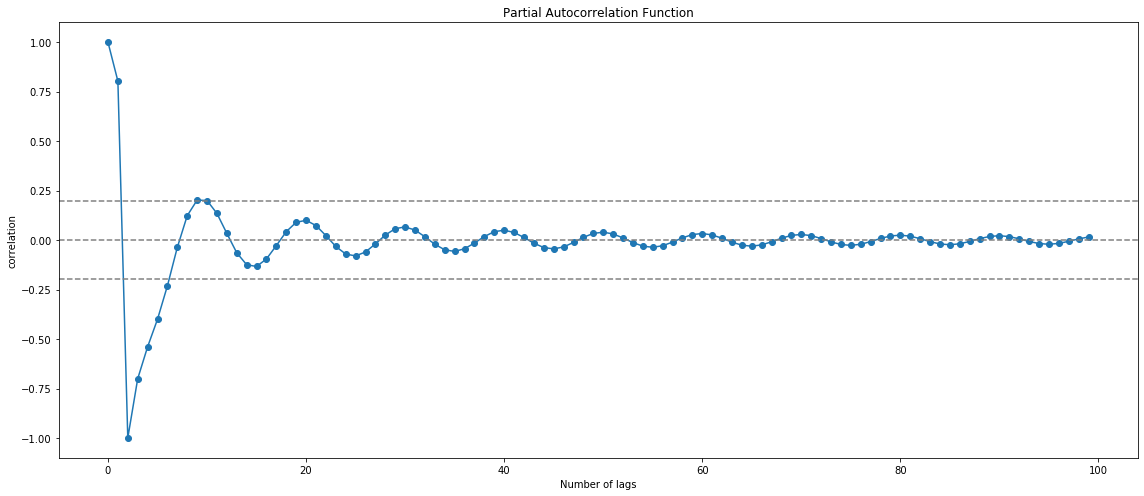

In [181]:
get_partial_autocorrelation_function(serie9, 99)

Invervalo de confianza superior: 0.196
Lag 0 = 1.0
Lag 1 = -0.8032946955795426
Lag 2 = -0.9999999999999988
Lag 3 = 0.7007458120453967
Lag 4 = -0.5393446629166315
Lag 5 = 0.40000000000000036
Lag 6 = -0.23114771267855688
Lag 7 = 0.036829054035464374
Lag 8 = 0.12320077687578443
Lag 9 = -0.20225424859373653
Lag 10 = 0.20000000000000023
Lag 11 = -0.1348361657291585
Lag 12 = 0.03393908015020189
Lag 13 = 0.0640242214819012
Lag 14 = -0.12446415298076076
Lag 15 = 0.13333333333333341
Lag 16 = -0.09517846992646484
Lag 17 = 0.027545532736822646
Lag 18 = 0.04276109813133304
Lag 19 = -0.08989077715277165
Lag 20 = 0.10000000000000019
Lag 21 = -0.07354699948863201
Lag 22 = 0.0228066577871999
Lag 23 = 0.03197832907831313
Lag 24 = -0.07034930385869084
Lag 25 = 0.08000000000000008
Lag 26 = -0.05992718476851502
Lag 27 = 0.019368437496808406
Lag 28 = 0.025497114779149645
Lag 29 = -0.05778692816963874
Lag 30 = 0.06666666666666672
Lag 31 = -0.05056356214843461
Lag 32 = 0.016799840042465
Lag 33 = 0.0211833004

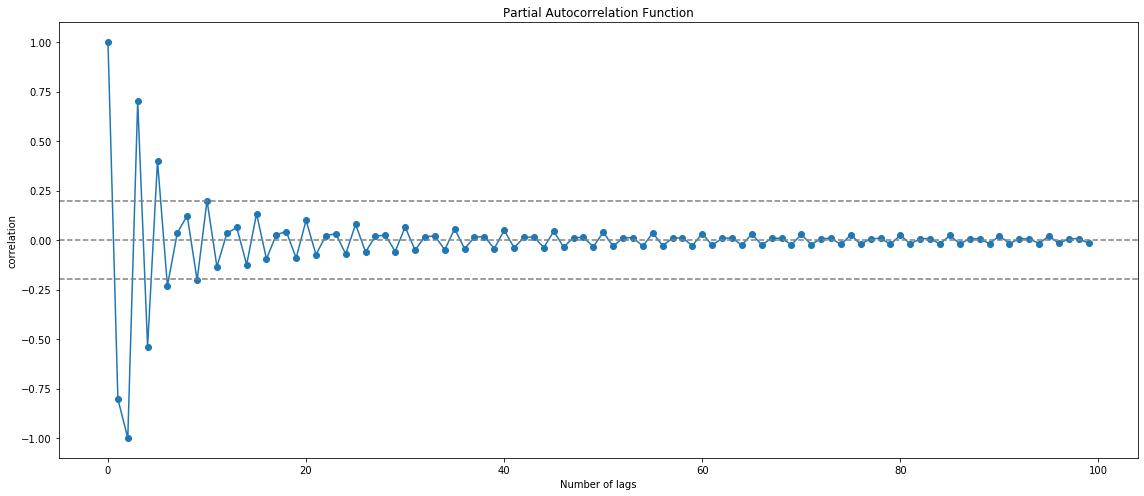

In [182]:
get_partial_autocorrelation_function(serie10, 99)

Invervalo de confianza superior: 0.196
Lag 0 = 1.0
Lag 1 = 0.4475138121546964
Lag 2 = 0.30916030534351147
Lag 3 = 0.23615160349854245
Lag 4 = 0.1910377358490567
Lag 5 = 0.16039603960396032
Lag 6 = 0.13822525597269633
Lag 7 = 0.12143928035982009
Lag 8 = 0.10828877005347601
Lag 9 = 0.09770808202653809
Lag 10 = 0.08901098901098901
Lag 11 = 0.08173562058526737
Lag 12 = 0.07555970149253734
Lag 13 = 0.07025151777970529
Lag 14 = 0.06564019448946515
Lag 15 = 0.06159695817490497
Lag 16 = 0.05802292263610316
Lag 17 = 0.05484089370345293
Lag 18 = 0.05198973042362003
Lag 19 = 0.049420378279438695
Lag 20 = 0.047093023255813986
Lag 21 = 0.044975013881177126
Lag 22 = 0.04303931987247606
Lag 23 = 0.04126337238920027
Lag 24 = 0.03962818003913895
Lag 25 = 0.03811764705882353
Lag 26 = 0.036718041704442435
Lag 27 = 0.03541757761259292
Lag 28 = 0.03420608108108107
Lag 29 = 0.03307472437729687
Lag 30 = 0.032015810276679844
Lag 31 = 0.031022596706242765
Lag 32 = 0.030089153046062404
Lag 33 = 0.02921024161557

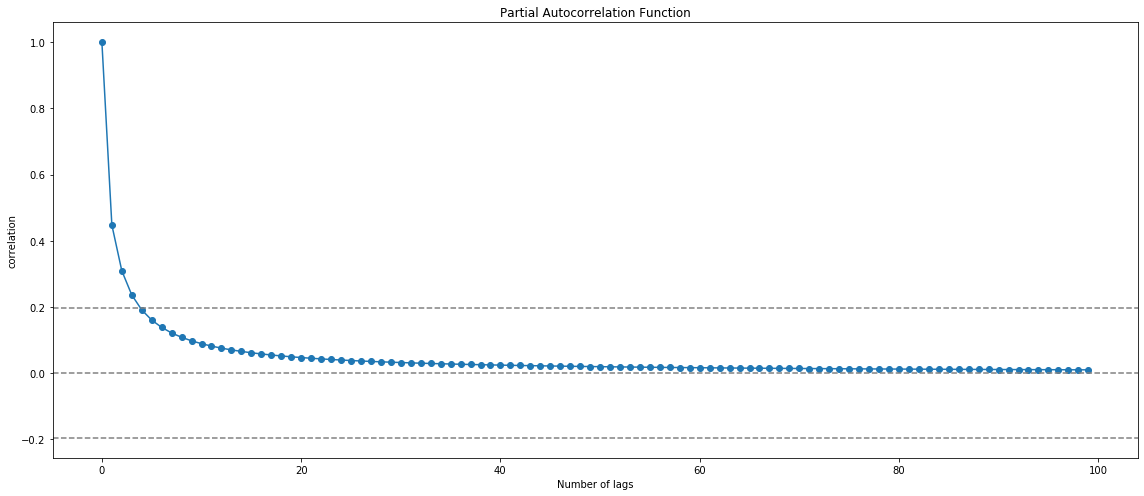

In [183]:
get_partial_autocorrelation_function(serie11, 99)

Invervalo de confianza superior: 0.196
Lag 0 = 1.0
Lag 1 = 0.9979456036946944
Lag 2 = -0.999999999999996
Lag 3 = -0.6671045919394896
Lag 4 = -0.5007872685630816
Lag 5 = -0.40110036943226796
Lag 6 = -0.3347278004994003
Lag 7 = -0.28739104869702686
Lag 8 = -0.251950683640569
Lag 9 = -0.22444018974095203
Lag 10 = -0.20247949737760831
Lag 11 = -0.1845538591197588
Lag 12 = -0.16965328631888277
Lag 13 = -0.1570783981144488
Lag 14 = -0.14632947658126172
Lag 15 = -0.1370398984223414
Lag 16 = -0.12893452840801356
Lag 17 = -0.12180279613834856
Lag 18 = -0.11548074589594835
Lag 19 = -0.10983875366861696
Lag 20 = -0.1047729277956558
Lag 21 = -0.10019896533651344
Lag 22 = -0.09604768278130127
Lag 23 = -0.09226171152124867
Lag 24 = -0.08879301837541262
Lag 25 = -0.08560102019644798
Lag 26 = -0.08265113267367358
Lag 27 = -0.07991364085417885
Lag 28 = -0.07736281107474378
Lag 29 = -0.07497618619160051
Lag 30 = -0.07273402153800967
Lag 31 = -0.07061883007759297
Lag 32 = -0.06861501316250086
Lag 33 = -0

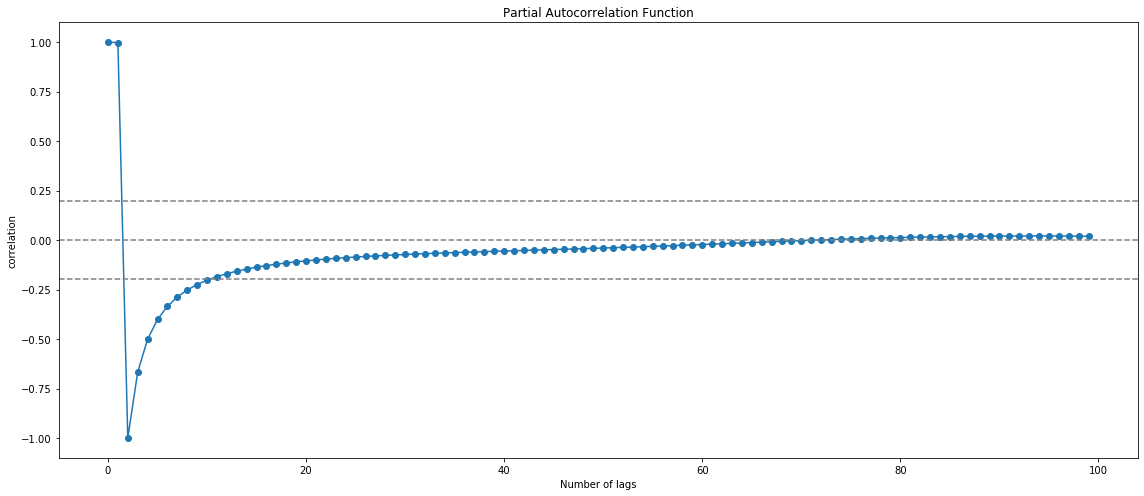

In [184]:
get_partial_autocorrelation_function(serie12, 99)

Invervalo de confianza superior: 0.196
Lag 0 = 1.0
Lag 1 = -0.3033594439673077
Lag 2 = -1.0000000000000004
Lag 3 = 0.5189276302272151
Lag 4 = 0.20601132958329907
Lag 5 = -0.4
Lag 6 = 0.08829056982141308
Lag 7 = 0.24082018485586307
Lag 8 = -0.19746454128039437
Lag 9 = -0.07725424859373721
Lag 10 = 0.19999999999999996
Lag 11 = -0.05150283239582429
Lag 12 = -0.13785437195025071
Lag 13 = 0.122480824582953
Lag 14 = 0.04754107605768464
Lag 15 = -0.1333333333333333
Lag 16 = 0.03635494051469929
Lag 17 = 0.09662786290438609
Lag 18 = -0.08881657623334774
Lag 19 = -0.03433522159721672
Lag 20 = 0.09999999999999996
Lag 21 = -0.028092454034085813
Lag 22 = -0.07439489687141157
Lag 23 = 0.06967756179650365
Lag 24 = 0.026871042989126216
Lag 25 = -0.07999999999999997
Lag 26 = 0.022890147731477257
Lag 27 = 0.06048283414870545
Lag 28 = -0.05732765674761349
Lag 29 = -0.02207264245535375
Lag 30 = 0.06666666666666661
Lag 31 = -0.019313562148433897
Lag 32 = -0.05095558296095848
Lag 33 = 0.048697664343528645
L

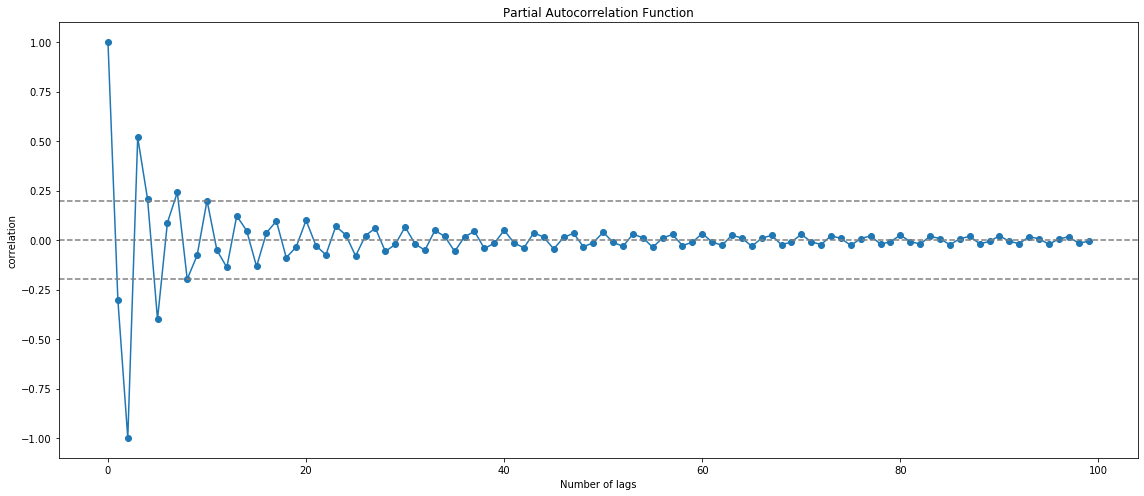

In [185]:
get_partial_autocorrelation_function(serie13, 99)

#### LAG plot
El lag plot muestra el valor de la serie en un momento "t" contra un valor en el tiempo "t + 1", esto muestra la relación directa entre cada uno de los valores de serie y su estado anterior. 

In [186]:
from pandas.plotting import lag_plot

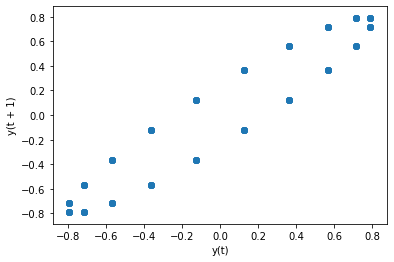

In [191]:
lag_plot(pd.Series(serie1))
plt.show()

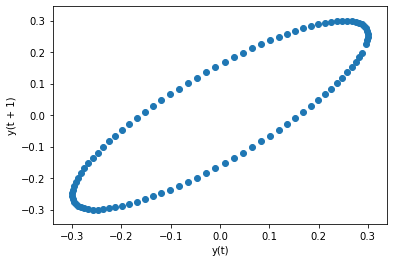

In [192]:
lag_plot(pd.Series(serie2))
plt.show()

El hecho de que los datos se mantengan cerca de la diagonal principal supone alguna relación entre las observaciones, al estar ordenados de manera simetrica sugiere que la relación es bastante estable.

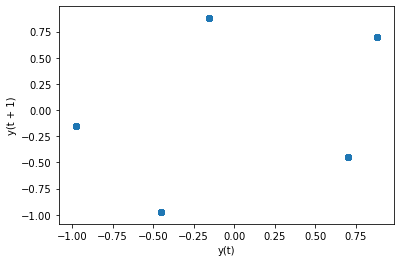

In [193]:
lag_plot(pd.Series(serie3))
plt.show()

En la serie3 parece que se graficaran menos valores, pero en realidad lo que sucede es que estas diferencias se repiten muchas veces y al se una señal sinusoidal las diferencias son identicas, lo mismo debe estar sucediendo con los otros gráficos pero hay menos valores superpuestos.

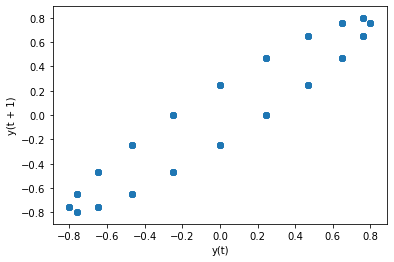

In [194]:
lag_plot(pd.Series(serie5))
plt.show()

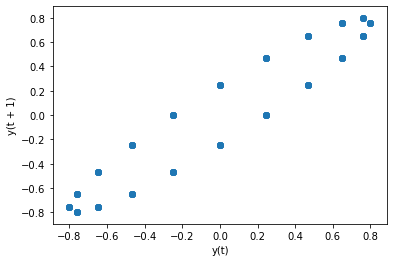

In [195]:
lag_plot(pd.Series(serie6))
plt.show()

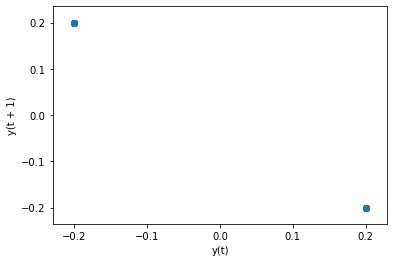

In [196]:
lag_plot(pd.Series(serie8))
plt.show()

Nuevamente parece que se reduce el número de valores medidos pero en realidad es una señal con la frecuencia aunmentada, por lo tanto la diferencia entre un valor y el anterior se mantiene muy estable.

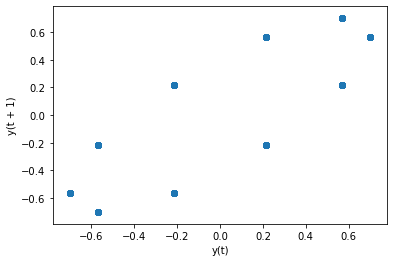

In [197]:
lag_plot(pd.Series(serie9))
plt.show()

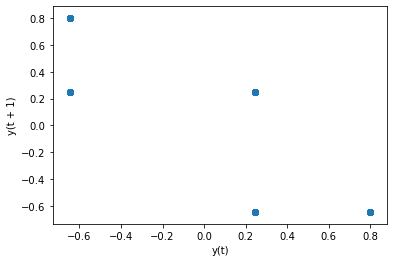

In [198]:
lag_plot(pd.Series(serie10))
plt.show()

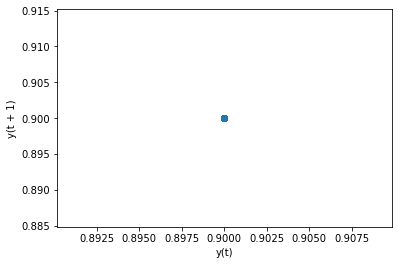

In [199]:
lag_plot(pd.Series(serie11))
plt.show()

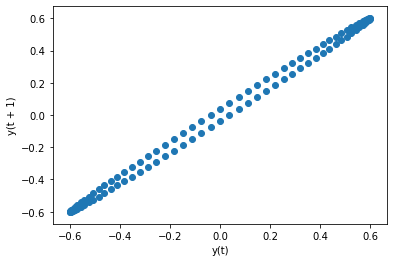

In [200]:
lag_plot(pd.Series(serie12))
plt.show()

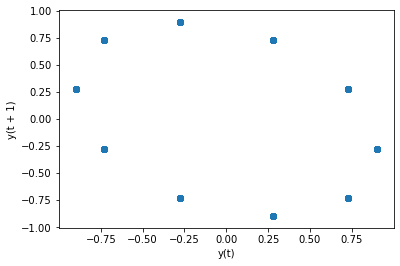

In [201]:
lag_plot(pd.Series(serie13))
plt.show()

In [202]:
from statsmodels.graphics.tsaplots import plot_acf

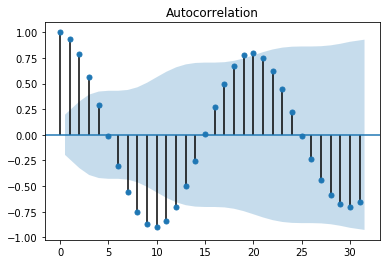

In [203]:
plot_acf(serie1, lags=31)
plt.show()

## To Do's
Para continuar con este análisis, los siguientes pasos son:
* ~Validar la estacionalidad de cada serie (la generada en cada ejercicio) y ver como cambian los valores de ADF.~
* ~Aplicar ACF y PACF a cada serie y analizar los resultados.~
* Probar una regresion lineal de almenos una de las series generadas.

### ARIMA

In [50]:
from statsmodels.tsa.arima_model import ARIMA

In [68]:
p = 2
d = 2
q = 2

model = ARIMA(series, order=(p,d,q))
model_fit = model.fit()
print(model_fit.summary())

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

## Referencias
* [Making Sinusoids with Python](http://www.mrcolson.com/2015/12/24/Making-Sinusoids-with-Python.html)
* [Funciones de autocorrelación y autocorrelación parcial - IBM Knowledge Center](https://www.ibm.com/support/knowledgecenter/es/SS3RA7_sub/modeler_mainhelp_client_ddita/components/dt/timeseries_acf_pacf.html)